## Importing Data

In [280]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [281]:
train = pd.read_csv('/kaggle/input/tahap-penyisihan-oq-dataquestua/train.csv')
test = pd.read_csv('/kaggle/input/tahap-penyisihan-oq-dataquestua/test.csv')
sample_submisson = pd.read_csv('/kaggle/input/tahap-penyisihan-oq-dataquestua/sample_submission.csv')

train.shape, test.shape, sample_submisson.shape

((341880, 20), (49368, 19), (49368, 2))

### Data Train and test rasio

In [282]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.1261808367071525

In [283]:
test

datetime               datetime_iso  time-zone           temp  \
0      1514764800  2018-01-01 00:00:00+00:00      28800       26.59 °C   
1      1514768400  2018-01-01 01:00:00+00:00      28800        26.51 C   
2      1514772000  2018-01-01 02:00:00+00:00      28800       28.68  C   
3      1514775600  2018-01-01 03:00:00+00:00      28800        28.84 C   
4      1514779200  2018-01-01 04:00:00+00:00      28800  29.75 Celcius   
...           ...                        ...        ...            ...   
49363  1692471600  2023-08-19 19:00:00+00:00      28800        24.37 C   
49364  1692475200  2023-08-19 20:00:00+00:00      28800        23.87 C   
49365  1692478800  2023-08-19 21:00:00+00:00      28800  23.87 Celcius   
49366  1692482400  2023-08-19 22:00:00+00:00      28800        23.87°C   
49367  1692486000  2023-08-19 23:00:00+00:00      28800        26.57 C   

      visibility   d_point     feels min_temp  max_temp        prssr  \
0            NaN     23.66     26.59    26.02     27.16         1009   
1            NaN     24.92  26.51 °C    26.06     28.04         1009   
2            NaN     25.71     34.68  28.03 C    29.3 C  1009.0 hPa.   
3            NaN     25.25     34.51    28.52  29.08 °C         1008   
4                    24.62     35.38  29.31 C     30.57         1007   
...          ...       ...       ...      ...       ...          ...   
49363        NaN     23.34     25.32   22.7°C   28.2 °C   1011.0 hPa   
49364        NaN     23.02   24.79 C    21.91  28.01 °C         1011   
49365        NaN     23.02     24.79    21.91     28.01         1011   
49366  undefined     23.02     24.79    21.91  28.01 °C    1011.0hPa   
49367        NaN  22.42  C   26.57 C    25.55     27.85         1012   

          sea_level    grnd_level     hum  wind_spd wind_deg      rain_3h  \
0               NaN  undetermined      84  1.45 m/s      355            0   
1               NaN  undetermined      91  1.67 m/s      351          0mm   
2               NaN           NaN      84  1.72 m/s   345.0°         0 mm   
3               NaN           NaN      81      1.49   339.0°  0 milimeter   
4      undetermined  undetermined      74  1.39 m/s   339.0°          NaN   
...             ...           ...     ...       ...      ...          ...   
49363           NaN  not-recorded      94      1.57   239.0°          NaN   
49364  undetermined  undetermined      95      1.53   235.0°            0   
49365           NaN       unknown  95.00%  1.53 m/s      235          NaN   
49366  undetermined           NaN  95.00%      1.53      235          NaN   
49367           NaN           NaN      78  2.13 m/s   211.0°          NaN   

           snow_1h      snow_3h  clouds  
0              NaN      no_snow      97  
1          no-snow  0 milimeter      95  
2      volume:zero            0      90  
3                0          NaN      91  
4                0     volume:0      96  
...            ...          ...     ...  
49363      no_snow            0      84  
49364          NaN            0      70  
49365          NaN          NaN      70  
49366            0          NaN  70.00%  
49367            0          NaN      87  

[49368 rows x 19 columns]

In [284]:
train

datetime               datetime_iso  time-zone           temp  \
0        283996800  1979-01-01 00:00:00+00:00      28800  24.75 Celcius   
1        284000400  1979-01-01 01:00:00+00:00      28800        24.58 C   
2        284004000  1979-01-01 02:00:00+00:00      28800   26.6 Celcius   
3        284007600  1979-01-01 03:00:00+00:00      28800  27.31 Celcius   
4        284011200  1979-01-01 04:00:00+00:00      28800          27.41   
...            ...                        ...        ...            ...   
341875  1514746800  2017-12-31 19:00:00+00:00      28800  25.06 Celcius   
341876  1514750400  2017-12-31 20:00:00+00:00      28800        24.51°C   
341877  1514754000  2017-12-31 21:00:00+00:00      28800        24.63 C   
341878  1514757600  2017-12-31 22:00:00+00:00      28800          26.68   
341879  1514761200  2017-12-31 23:00:00+00:00      28800        26.49 C   

          visibility   d_point     feels min_temp   max_temp       prssr  \
0                NaN  23.89  C   25.76 C    24.28    25.22°C        1012   
1                NaN   23.73 C   25.57 C  23.99 C    25.26 C        1012   
2       unidentified   24.06 C    26.6 C   26.1 C      27.39        1012   
3                NaN   24.37 C    30.9 C    26.59    28.36 C        1012   
4                NaN  25.05  C   31.54 C  26.58 C   28.31 °C        1011   
...              ...       ...       ...      ...        ...         ...   
341875           NaN     24.55  131.53 C  24.44 C      25.69        1007   
341876           NaN   24.17°C     25.58  23.89 C      25.13        1006   
341877           NaN     24.29    129.32       24  126.96  C  1007.0 hPa   
341878           NaN     24.71     29.76  25.02 C   27.25 °C        1008   
341879           NaN      24.9     26.49    26.02   27.09 °C        1008   

           sea_level    grnd_level     hum  wind_spd wind_deg rain_1h  \
0       undetermined           NaN      95      0.82  320.0 °    zero   
1                NaN           NaN      95  0.96 m/s   338.0°       0   
2                NaN  undetermined      86  1.22 m/s   339.0°       0   
3                NaN  undetermined      84  1.08 m/s      342    0.13   
4                NaN  undetermined      87      0.86   336.0°    0.34   
...              ...           ...     ...       ...      ...     ...   
341875  undetermined           NaN      97       0.9       13       0   
341876  undetermined  undetermined      98  0.85 m/s    21.0°           
341877           NaN  undetermined      98  1.54 m/s   26.0 °       0   
341878  undetermined           NaN  89.00%   1.46m/s       17  0.3 mm   
341879  undetermined  not recorded      91      1.56     6.0°    0.19   

            rain_3h snow_1h   snow_3h clouds  
0                 0     NaN       NaN    100  
1                 0       0         0    100  
2       volume:zero     NaN       NaN     99  
3               nol       0       NaN     94  
4               nol     NaN         0    100  
...             ...     ...       ...    ...  
341875            0       0         0     99  
341876          NaN     NaN         0    100  
341877          NaN       0   no_snow     97  
341878            0       0  volume:0     98  
341879      no-rain       0       NaN     99  

[341880 rows x 20 columns]

The feature can be desribe as follow:
* *datetime* : Waktu ketika data dihitung (dalam format timestamp UNIX).
* *datetime_iso* : Waktu dalam format ISO 8601, termasuk zona waktu.
* *time-zone* : Zona waktu dalam detik terhadap UTC.
* *temp* : Suhu saat ini dalam Celcius.
* *visibility* : Visibilitas rata-rata dalam meter.
* *d_point* : Titik embun saat ini dalam Celcius.
* *feels* : Suhu yang dirasakan saat ini dalam Celcius.
* *min_temp* : Suhu minimum dalam rentang waktu tertentu dalam Celcius.
* *max_temp* : Suhu maksimum dalam rentang waktu tertentu dalam Celcius.
* *pressure* : Tekanan atmosfer dalam hPa .
* *sea_level* : Tekanan atmosfer pada permukaan laut dalam hPa.
* *grnd_level* : Tekanan atmosfer pada permukaan tanah dalam hPa.
* *hum* : Persentase kelembaban udara saat ini.
* *wind_spd* : Kecepatan angin saat ini dalam m/s.
* *wind_deg* : Arah angin dalam derajat.
* *rain_1h* : Curah hujan dalam 1 jam terakhir dalam mm. (variabel target)
* *rain_3h* : Curah hujan dalam 3 jam terakhir dalam mm.
* *snow_1h* : Curah salju dalam 1 jam terakhir dalam mm.
* *snow_3h* : Curah salju dalam 3 jam terakhir dalam mm.
* *clouds* : Persentase penutupan awan saat ini.

## Preprocessing

### Checking Null and NaN value

In [285]:
test.isnull().sum()

datetime            0
datetime_iso        0
time-zone           0
temp                0
visibility      41835
d_point             1
feels               0
min_temp            0
max_temp            0
prssr               0
sea_level       21674
grnd_level      21502
hum                 0
wind_spd            0
wind_deg            0
rain_3h         21527
snow_1h         21702
snow_3h         21565
clouds              0
dtype: int64

In [286]:
test.isna().sum()

datetime            0
datetime_iso        0
time-zone           0
temp                0
visibility      41835
d_point             1
feels               0
min_temp            0
max_temp            0
prssr               0
sea_level       21674
grnd_level      21502
hum                 0
wind_spd            0
wind_deg            0
rain_3h         21527
snow_1h         21702
snow_3h         21565
clouds              0
dtype: int64

In [287]:
train.isnull().sum()

datetime             0
datetime_iso         0
time-zone            0
temp                 0
visibility      290768
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
sea_level       148916
grnd_level      148961
hum                  0
wind_spd             0
wind_deg             0
rain_1h              0
rain_3h         149551
snow_1h         149184
snow_3h         149181
clouds               0
dtype: int64

In [288]:
train.isna().sum()

datetime             0
datetime_iso         0
time-zone            0
temp                 0
visibility      290768
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
sea_level       148916
grnd_level      148961
hum                  0
wind_spd             0
wind_deg             0
rain_1h              0
rain_3h         149551
snow_1h         149184
snow_3h         149181
clouds               0
dtype: int64

Seems like we have some missing value issue on few columns for both train and test sets. We can check how much its from overall dataset

In [289]:
## Checking missing values using nulls_summary_table function

def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = (null_values[0]/len(df) ) *100
    null_values.columns = ['null_count','null_percentage']
    return null_values

nulls_summary_table(train)

null_count  null_percentage
datetime               0         0.000000
datetime_iso           0         0.000000
time-zone              0         0.000000
temp                   0         0.000000
visibility        290768        85.049725
d_point                0         0.000000
feels                  0         0.000000
min_temp               0         0.000000
max_temp               0         0.000000
prssr                  0         0.000000
sea_level         148916        43.557974
grnd_level        148961        43.571136
hum                    0         0.000000
wind_spd               0         0.000000
wind_deg               0         0.000000
rain_1h                0         0.000000
rain_3h           149551        43.743711
snow_1h           149184        43.636364
snow_3h           149181        43.635486
clouds                 0         0.000000

We can see that visibility have 85% missing value, where sea_level, grnd_level, rain_3h, snow_1h, snow_3h have around 43% of missing value. 

Lets check the data for each of the missing value and see what contains in those columns

### Searching unique value of column

In [290]:
train['sea_level'].unique()

array(['undetermined', nan, 'unsettled', 'unestablished', '-1',
       'not recorded', 'unknown', 'not_recorded', 'not-recorded',
       'unspecified'], dtype=object)

In [291]:
train['grnd_level'].unique()

array([nan, 'undetermined', 'not recorded', 'unspecified', 'unknown',
       'not_recorded', '-1', 'unestablished', 'not-recorded', 'unsettled'],
      dtype=object)

In [292]:
train['visibility'].unique()

array([nan, 'unidentified', ' ', '-1m', 'unrecognized', 'unknown',
       '-1 km', '-1', 'empty', 'undefined', '-1km', '-1 m', 'missing'],
      dtype=object)

In [293]:
train['rain_3h'].unique()

array(['0', 'volume:zero', 'nol', nan, 'zero', '0 mm', '0 milimeter',
       'no_rain', 'no-rain', 'volume:0', '0mm'], dtype=object)

In [294]:
train['rain_1h'].unique()

array(['zero', '0', '0.13', ..., '8.21 mm', '9.53', '9.16 mm'],
      dtype=object)

Our suspicion is correct! most of the data is just a bunch of unrecognize and non important data that we can simply just drop

### Dropping noise column
We also drop the datetime column because its redundant with datetime_iso and also datetime_iso provide more time characteristic like hours that we can extract for feature

In [295]:
# Define a list of column names to drop
columns_to_drop = ['sea_level', 'grnd_level', 'visibility', 'rain_3h', 'snow_1h', 'snow_3h', 'time-zone', 'datetime']

# Drop the specified columns from the DataFrame
train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1)

### Convert the data type
Now we can remove the unit on each of the data and convert that to numeric type

In [296]:
for col in train.columns:
    if col not in ['datetime', 'datetime_iso']:
        train[col] = train[col].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))
        train[col] = train[col].apply(lambda x: re.sub(r'\.$', '', str(x)))

for col in test.columns:
    if col not in ['datetime', 'datetime_iso']:
        test[col] = test[col].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))
        test[col] = test[col].apply(lambda x: re.sub(r'\.$', '', str(x)))

In [297]:
for col in train.columns:
    if col not in ['datetime', 'datetime_iso']:
        train = train.apply(pd.to_numeric, errors='ignore')
        
for col in test.columns:
    if col not in ['datetime', 'datetime_iso']:
        test = test.apply(pd.to_numeric, errors='ignore')

We also convert the format date on datetime_iso

In [298]:
train['datetime_iso']=pd.to_datetime(train['datetime_iso'])
test['datetime_iso']=pd.to_datetime(test['datetime_iso'])

In [299]:
train

datetime_iso   temp  d_point   feels  min_temp  max_temp  \
0      1979-01-01 00:00:00+00:00  24.75    23.89   25.76     24.28     25.22   
1      1979-01-01 01:00:00+00:00  24.58    23.73   25.57     23.99     25.26   
2      1979-01-01 02:00:00+00:00  26.60    24.06   26.60     26.10     27.39   
3      1979-01-01 03:00:00+00:00  27.31    24.37   30.90     26.59     28.36   
4      1979-01-01 04:00:00+00:00  27.41    25.05   31.54     26.58     28.31   
...                          ...    ...      ...     ...       ...       ...   
341875 2017-12-31 19:00:00+00:00  25.06    24.55  131.53     24.44     25.69   
341876 2017-12-31 20:00:00+00:00  24.51    24.17   25.58     23.89     25.13   
341877 2017-12-31 21:00:00+00:00  24.63    24.29  129.32     24.00    126.96   
341878 2017-12-31 22:00:00+00:00  26.68    24.71   29.76     25.02     27.25   
341879 2017-12-31 23:00:00+00:00  26.49    24.90   26.49     26.02     27.09   

         prssr   hum  wind_spd  wind_deg  rain_1h  clouds  
0       1012.0  95.0      0.82     320.0      NaN   100.0  
1       1012.0  95.0      0.96     338.0     0.00   100.0  
2       1012.0  86.0      1.22     339.0     0.00    99.0  
3       1012.0  84.0      1.08     342.0     0.13    94.0  
4       1011.0  87.0      0.86     336.0     0.34   100.0  
...        ...   ...       ...       ...      ...     ...  
341875  1007.0  97.0      0.90      13.0     0.00    99.0  
341876  1006.0  98.0      0.85      21.0      NaN   100.0  
341877  1007.0  98.0      1.54      26.0     0.00    97.0  
341878  1008.0  89.0      1.46      17.0     0.30    98.0  
341879  1008.0  91.0      1.56       6.0     0.19    99.0  

[341880 rows x 12 columns]

### Time Extraction

Here we doing a bit of time extraction on datetime_iso as a an additional feature later on

In [300]:
#data day year month extraction
def time_extract(df):
    # df['day']=df['datetime_iso'].dt.day
    # df['year']=df['datetime_iso'].dt.year
    df['month']=df['datetime_iso'].dt.month
#     df["hour"] = df["datetime_iso"].dt.hour
    # df["hour"] = np.sin(train.date_time.dt.hour / 24 * np.pi)
    
#     df["day_of_week"] = df["datetime_iso"].dt.dayofweek
#     df["day_of_year"] = df["datetime_iso"].dt.dayofyear
    df["quarter"] = df["datetime_iso"].dt.quarter
    df["week_of_year"] = df["datetime_iso"].dt.isocalendar().week.astype("int")
    
    return df.copy()


train = time_extract(train.copy())
test = time_extract(test.copy())

## EDA

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   datetime_iso  341880 non-null  datetime64[ns, UTC]
 1   temp          341880 non-null  float64            
 2   d_point       341880 non-null  float64            
 3   feels         341880 non-null  float64            
 4   min_temp      341880 non-null  float64            
 5   max_temp      341880 non-null  float64            
 6   prssr         341880 non-null  float64            
 7   hum           341880 non-null  float64            
 8   wind_spd      341880 non-null  float64            
 9   wind_deg      341880 non-null  float64            
 10  rain_1h       315282 non-null  float64            
 11  clouds        341880 non-null  float64            
 12  month         341880 non-null  int32              
 13  quarter       341880 non-null  int32        

In [302]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime_iso  49368 non-null  datetime64[ns, UTC]
 1   temp          49368 non-null  float64            
 2   d_point       49367 non-null  float64            
 3   feels         49368 non-null  float64            
 4   min_temp      49368 non-null  float64            
 5   max_temp      49368 non-null  float64            
 6   prssr         49368 non-null  float64            
 7   hum           49368 non-null  float64            
 8   wind_spd      49368 non-null  float64            
 9   wind_deg      49368 non-null  float64            
 10  clouds        49368 non-null  float64            
 11  month         49368 non-null  int32              
 12  quarter       49368 non-null  int32              
 13  week_of_year  49368 non-null  int64              
dtypes: dat

*Now we're checking on distribution on training and test set*.
We get an awsome data visualization based on this [reference notebook](https://www.kaggle.com/code/fadhilmuh/pss3e9-eda-and-feature-engineering#Feature-Engineering)

In [303]:
train.describe()

temp        d_point          feels       min_temp  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       28.296996      26.056234      31.092778      27.483902   
std        13.325830      12.080483      15.228520      12.924432   
min        21.550000      13.960000      22.350000      14.120000   
25%        24.980000      23.950000      25.990000      24.250000   
50%        26.200000      24.570000      26.650000      25.480000   
75%        28.390000      25.240000      33.370000      27.640000   
max       177.260000     141.590000     202.710000     162.920000   

            max_temp          prssr            hum       wind_spd  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       29.359565    1070.965439      94.221361       1.474819   
std        13.802332     494.701076      44.888444       1.104015   
min        22.370000    1001.000000      29.000000       0.000000   
25%        25.970000    1009.000000      83.000000       0.880000   
50%        27.270000    1010.000000      92.000000       1.270000   
75%        29.310000    1011.000000      96.000000       1.800000   
max       187.170000    5115.510000     503.000000      25.000000   

            wind_deg        rain_1h        clouds         month  \
count  341880.000000  315282.000000  341880.00000  341880.00000   
mean      210.867372       0.401359      85.44976       6.52285   
std       147.667380       0.973691      22.80106       3.44873   
min         0.000000       0.000000       0.00000       1.00000   
25%       149.000000       0.000000      81.00000       4.00000   
50%       203.000000       0.000000      97.00000       7.00000   
75%       279.000000       0.290000     100.00000      10.00000   
max      1810.800000      27.100000     100.00000      12.00000   

             quarter   week_of_year  
count  341880.000000  341880.000000  
mean        2.508529      26.591155  
std         1.117092      15.062641  
min         1.000000       1.000000  
25%         2.000000      14.000000  
50%         3.000000      27.000000  
75%         4.000000      40.000000  
max         4.000000      53.000000

We see that there is high difference between mean and max value suspecting there is outliers in our data. Lets plot and visualize them

In [304]:
features = ['temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','clouds','month','quarter','week_of_year']

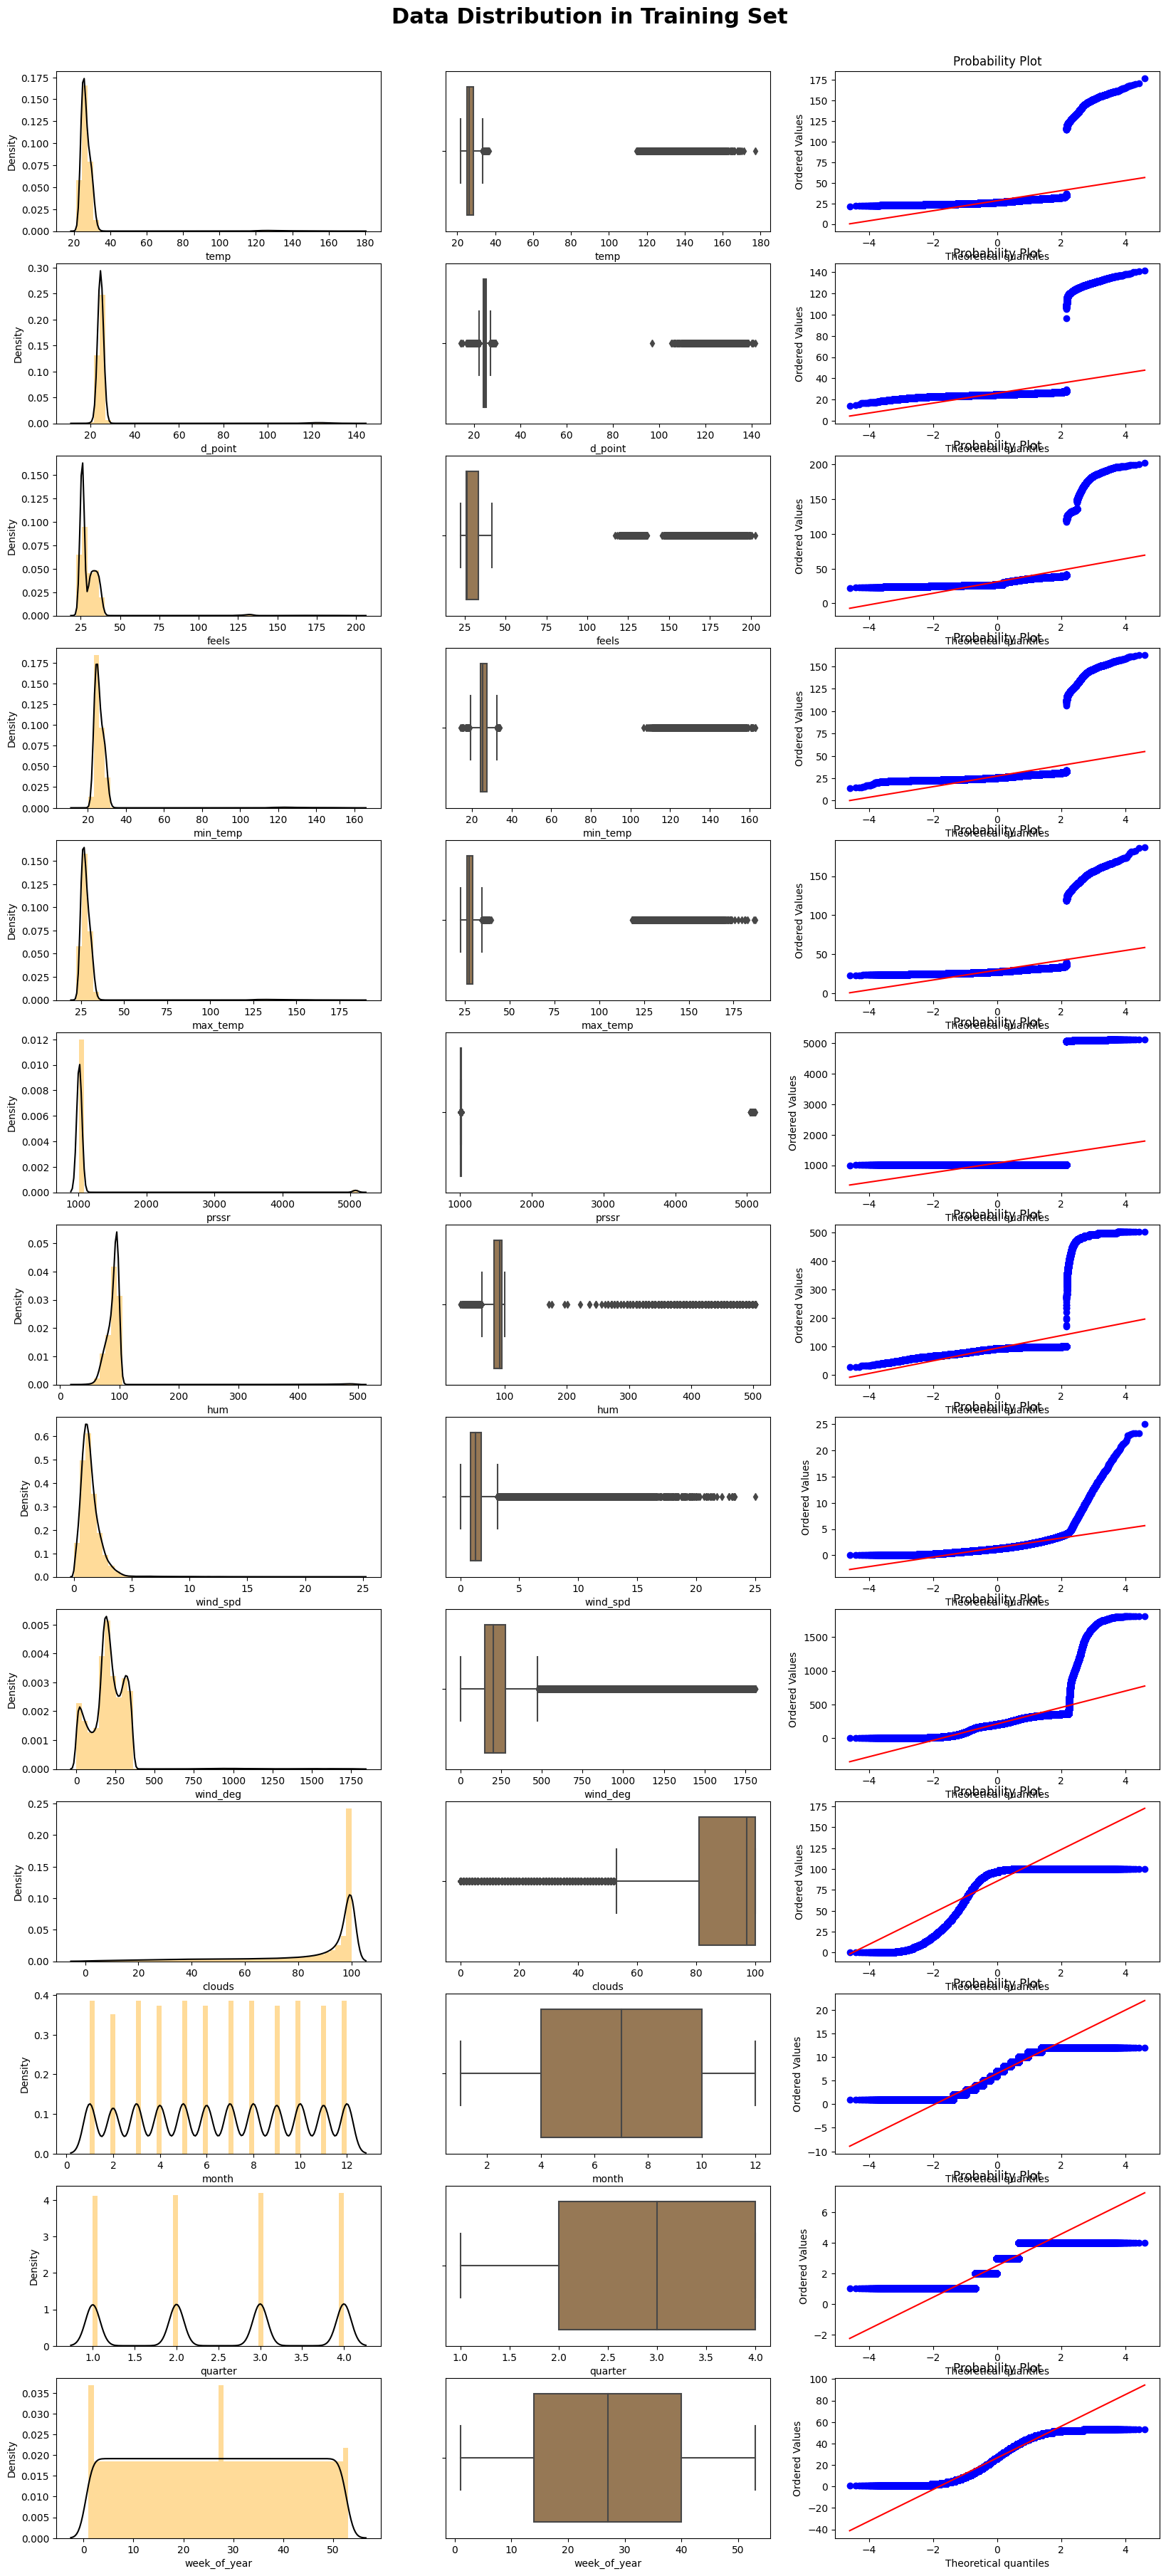

In [305]:
from scipy.stats import probplot
# import warnings
# warnings.filterwarnings('ignore')



fig, axes = plt.subplots(len(features),3,figsize=(20,45))

for f,(ax1,ax2,ax3) in enumerate(axes):
    sns.distplot(train[features[f]],ax=ax1,hist_kws={'color':'orange'}).lines[0].set_color('black')
    sns.boxplot(x=features[f],data=train,ax=ax2,palette='cubehelix')
    probplot(train[features[f]],plot=ax3)

fig.suptitle('Data Distribution in Training Set',fontsize=22,fontweight='bold',y=0.9)
plt.show()

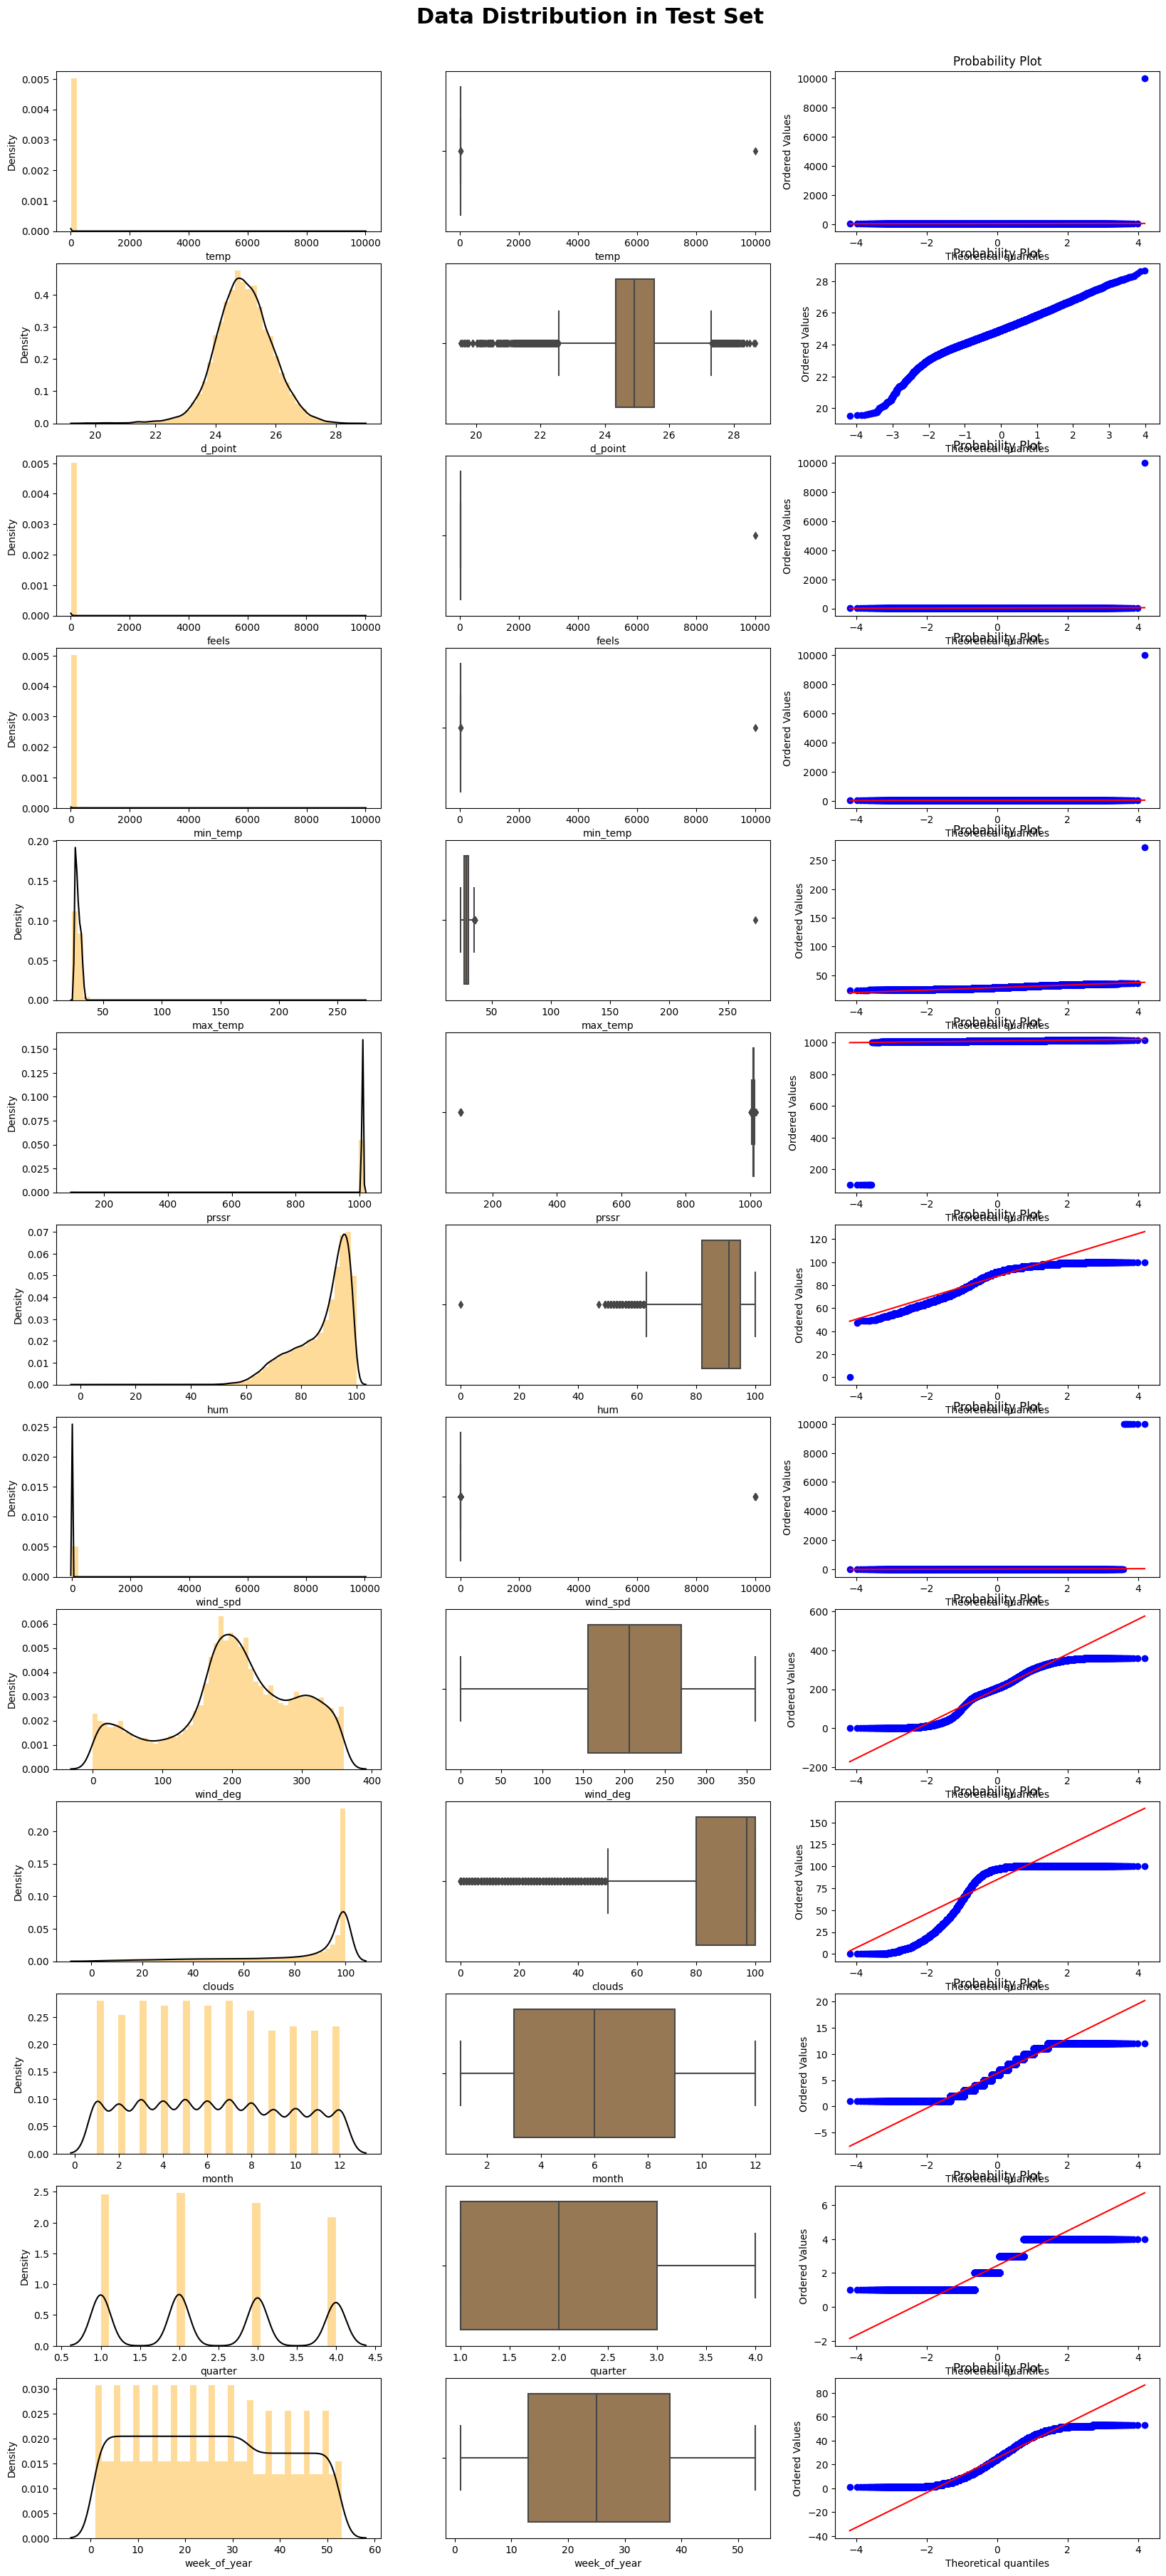

In [306]:
from scipy.stats import probplot
# import warnings
# warnings.filterwarnings('ignore')

features = ['temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','clouds','month','quarter','week_of_year']
fig, axes = plt.subplots(len(features),3,figsize=(20,45))

for f,(ax1,ax2,ax3) in enumerate(axes):
    sns.distplot(test[features[f]],ax=ax1,hist_kws={'color':'orange'}).lines[0].set_color('black')
    sns.boxplot(x=features[f],data=test,ax=ax2,palette='cubehelix')
    probplot(test[features[f]],plot=ax3)

fig.suptitle('Data Distribution in Test Set',fontsize=22,fontweight='bold',y=0.9)
plt.show()

We see that our data contain a very high value that can be indicator of outliers. We can trim this outliers since it can affect our machine learning model behavior and prediction.

# Data Preprocessing: Outlier Removal

This code segment plays a critical role in the data preprocessing phase. Its primary purpose is to eliminate extreme values from the dataset by removing data points that fall beyond the 97.5th and 0.025th percentiles. These extreme values, often referred to as "outliers," can significantly skew statistical analyses and machine learning models.

By applying this step, we enhance the robustness and reliability of our data, allowing subsequent analyses and modeling to be more accurate and representative of the underlying patterns in the dataset.

This approach draws inspiration from a reference available at [this link](https://www.kaggle.com/code/fadhilmuh/pss3e9-eda-and-feature-engineering#Feature-Engineering), which provides further insights and context into the importance of outlier handling in data analysis and feature engineering.

In [307]:
def winsorize(df, column, upper, lower):
    col_df = df[column]
    
    perc_upper = np.percentile(df[column],upper)
    perc_lower = np.percentile(df[column],lower)
    
    df[column] = np.where(df[column] >= perc_upper, 
                          perc_upper, 
                          df[column])
    
    df[column] = np.where(df[column] <= perc_lower, 
                          perc_lower, 
                          df[column])
    
    return df[column]

In [308]:
train1 = train.copy()
test1 = test.copy()

for col in features:
    if col in ['temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','clouds']:
        train1[col] = winsorize(train.copy(),col,97.5,0.025)
        test1[col] = winsorize(test.copy(),col,97.5,0.025)

In [309]:
train1.describe()

temp        d_point          feels       min_temp  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       26.755430      24.603917      29.454458      25.989055   
std         2.234161       1.003063       4.436969       2.175351   
min        22.650000      18.994698      23.520000      21.294698   
25%        24.980000      23.950000      25.990000      24.250000   
50%        26.200000      24.570000      26.650000      25.480000   
75%        28.390000      25.240000      33.370000      27.640000   
max        32.000000      26.910000      38.630000      30.920000   

            max_temp          prssr            hum       wind_spd  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       27.759501    1009.976887      88.997716       1.416392   
std         2.269555       1.890996       9.383725       0.766278   
min        23.520000    1003.000000      42.000000       0.020000   
25%        25.970000    1009.000000      83.000000       0.880000   
50%        27.270000    1010.000000      92.000000       1.270000   
75%        29.310000    1011.000000      96.000000       1.800000   
max        33.120000    1014.000000      99.000000       3.600000   

            wind_deg        rain_1h        clouds         month  \
count  341880.000000  315282.000000  341880.00000  341880.00000   
mean      200.818135       0.401359      85.44976       6.52285   
std        96.632458       0.973691      22.80106       3.44873   
min         0.000000       0.000000       0.00000       1.00000   
25%       149.000000       0.000000      81.00000       4.00000   
50%       203.000000       0.000000      97.00000       7.00000   
75%       279.000000       0.290000     100.00000      10.00000   
max       355.000000      27.100000     100.00000      12.00000   

             quarter   week_of_year  
count  341880.000000  341880.000000  
mean        2.508529      26.591155  
std         1.117092      15.062641  
min         1.000000       1.000000  
25%         2.000000      14.000000  
50%         3.000000      27.000000  
75%         4.000000      40.000000  
max         4.000000      53.000000

In [310]:
test1.describe()

temp       d_point         feels      min_temp      max_temp  \
count  49368.000000  49367.000000  49368.000000  49368.000000  49368.000000   
mean      27.283105     24.934560     30.427493     26.384348     28.348857   
std        2.207848      0.941582      4.606885      2.075413      2.162693   
min       23.073417     19.510000     23.927592     21.600000     24.096835   
25%       25.510000     24.340000     26.270000     24.760000     26.600000   
50%       26.710000     24.920000     29.890000     25.950000     28.040000   
75%       29.000000     25.530000     34.770000     28.020000     30.020000   
max       32.070000     28.670000     38.830000     30.770000     33.070000   

              prssr           hum      wind_spd      wind_deg        clouds  \
count  49368.000000  49368.000000  49368.000000  49368.000000  49368.000000   
mean    1010.019831     87.642582      1.373683    201.646937     84.822800   
std        1.795428      9.841399      0.684806     90.840439     23.233429   
min     1003.000000     50.000000      0.023418      0.000000      0.000000   
25%     1009.000000     82.000000      0.890000    156.000000     80.000000   
50%     1010.000000     91.000000      1.270000    206.000000     97.000000   
75%     1011.000000     95.000000      1.760000    270.000000    100.000000   
max     1013.000000     99.000000      3.170000    350.000000    100.000000   

              month       quarter  week_of_year  
count  49368.000000  49368.000000  49368.000000  
mean       6.279047      2.432183     25.520175  
std        3.402672      1.103942     14.867011  
min        1.000000      1.000000      1.000000  
25%        3.000000      1.000000     13.000000  
50%        6.000000      2.000000     25.000000  
75%        9.000000      3.000000     38.000000  
max       12.000000      4.000000     53.000000

Now we can see that our data is more normal now. We also have a hunch that value that are **greater than 15 in columns rain_1h** is also an anomalies so we decided to fill it with max threshold.

In [311]:
# Create a mask to identify values greater than 15
mask = train1['rain_1h'] > 15

# Set the values greater than 15 to NaN
train1.loc[mask, 'rain_1h'] = np.nan

# Use bfill to fill the NaN values with the previous values
train1['rain_1h'].fillna(method='bfill', inplace=True)

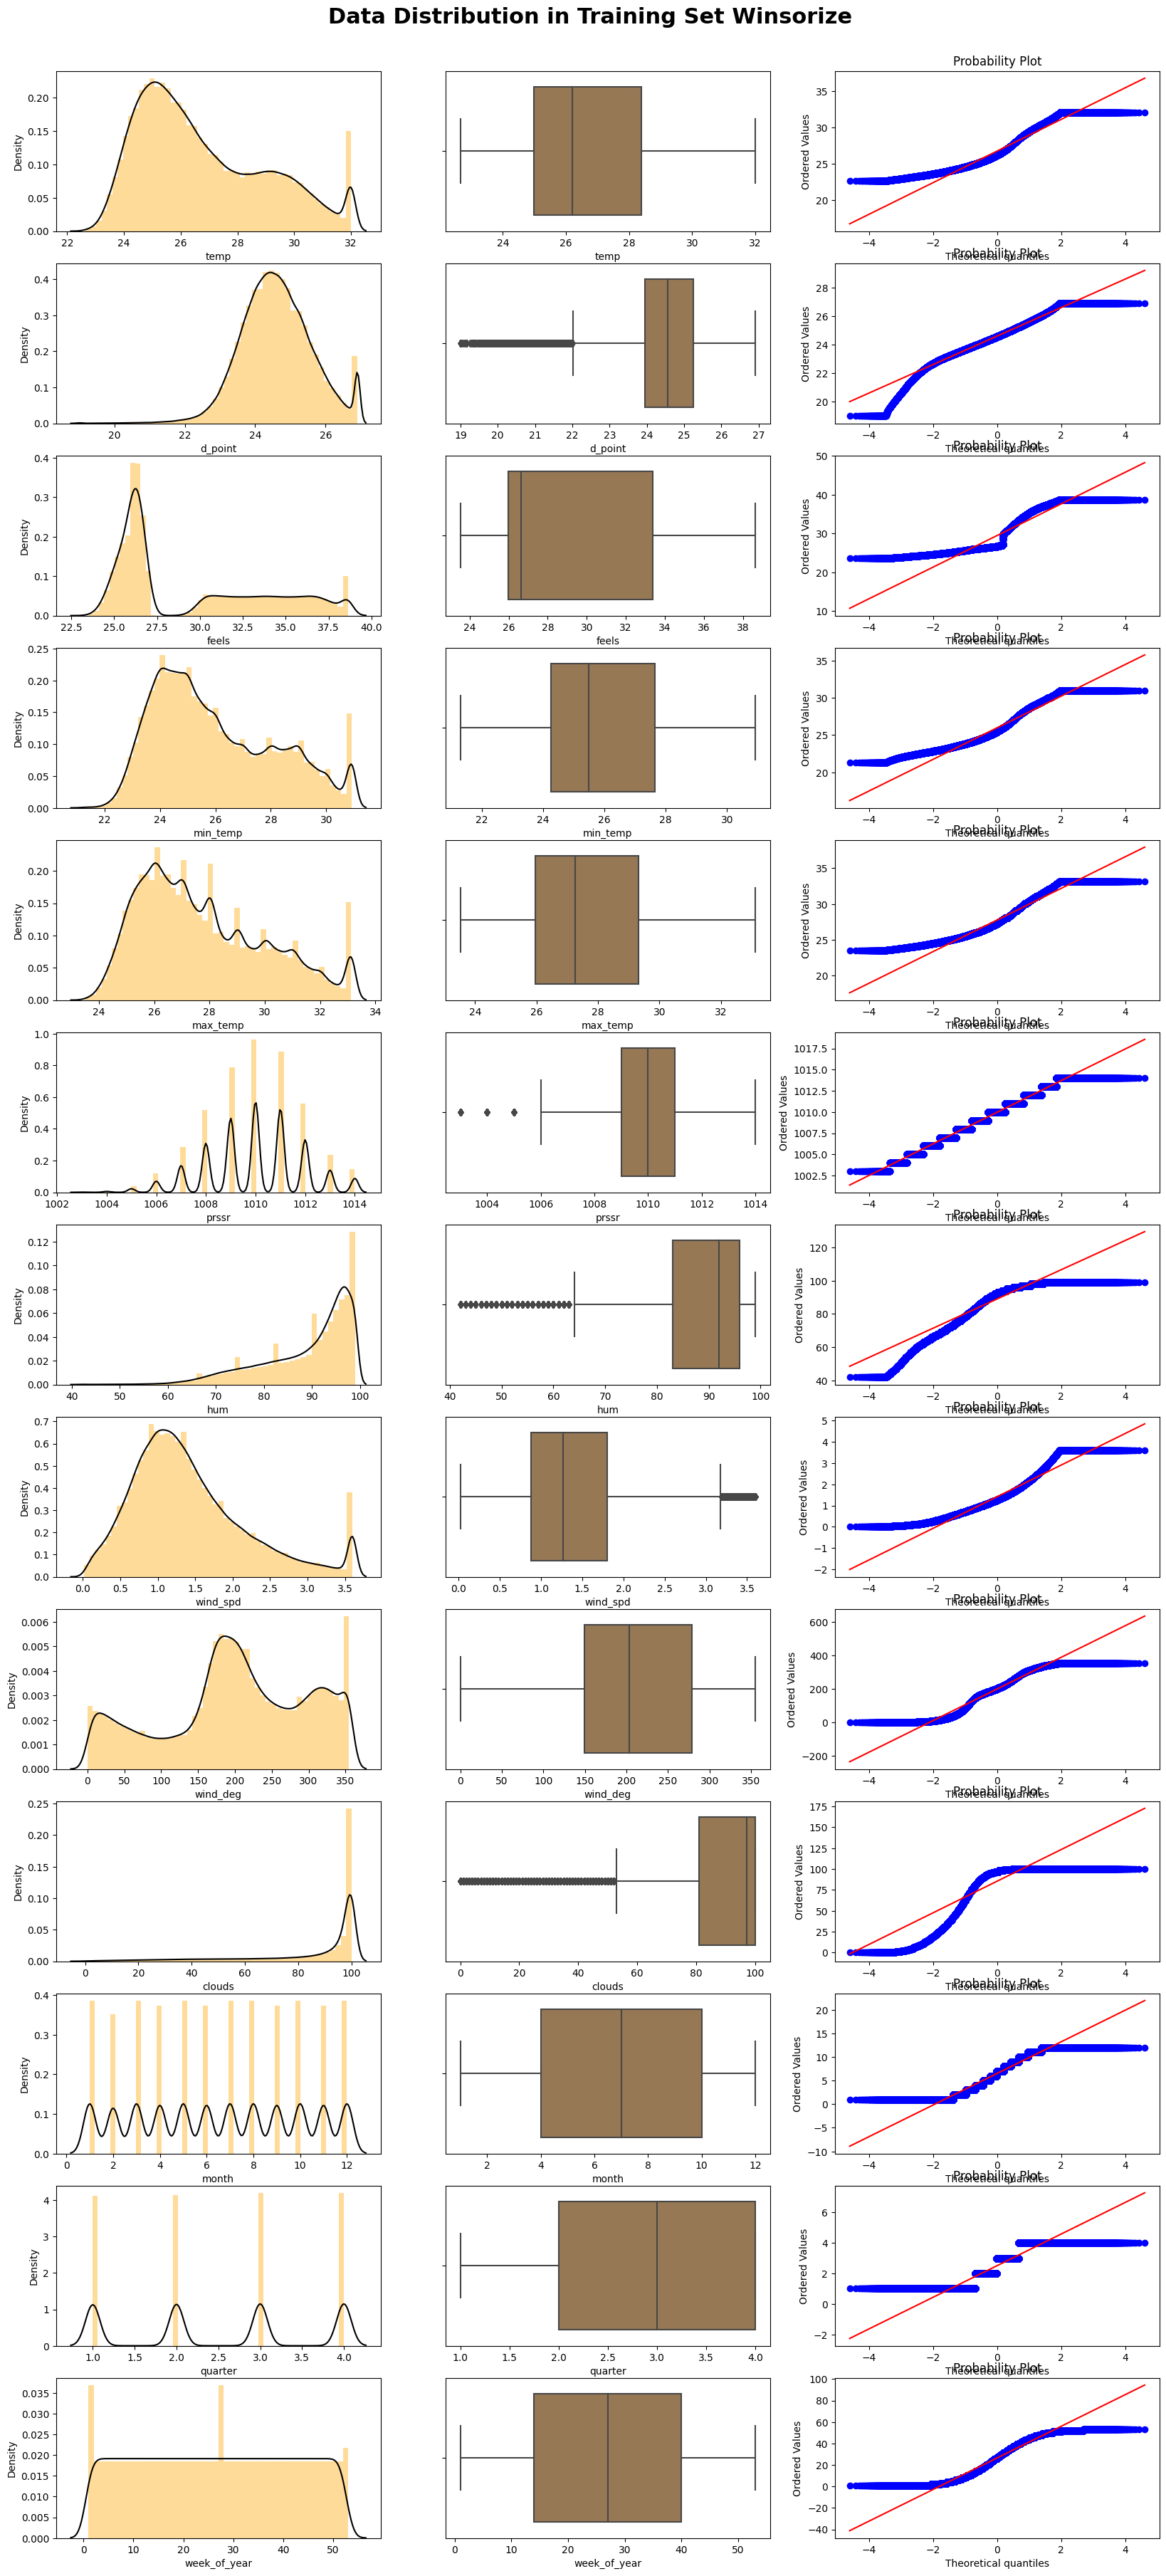

In [312]:
from scipy.stats import probplot
# import warnings
# warnings.filterwarnings('ignore')


features = ['temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','clouds','month','quarter','week_of_year']
fig, axes = plt.subplots(len(features),3,figsize=(20,45))

for f,(ax1,ax2,ax3) in enumerate(axes):
    sns.distplot(train1[features[f]],ax=ax1,hist_kws={'color':'orange'}).lines[0].set_color('black')
    sns.boxplot(x=features[f],data=train1,ax=ax2,palette='cubehelix')
    probplot(train1[features[f]],plot=ax3)

fig.suptitle('Data Distribution in Training Set Winsorize',fontsize=22,fontweight='bold',y=0.9)
plt.show()

With the same code, we can see that our data looks more normal and can fit the probability plot more accurately.

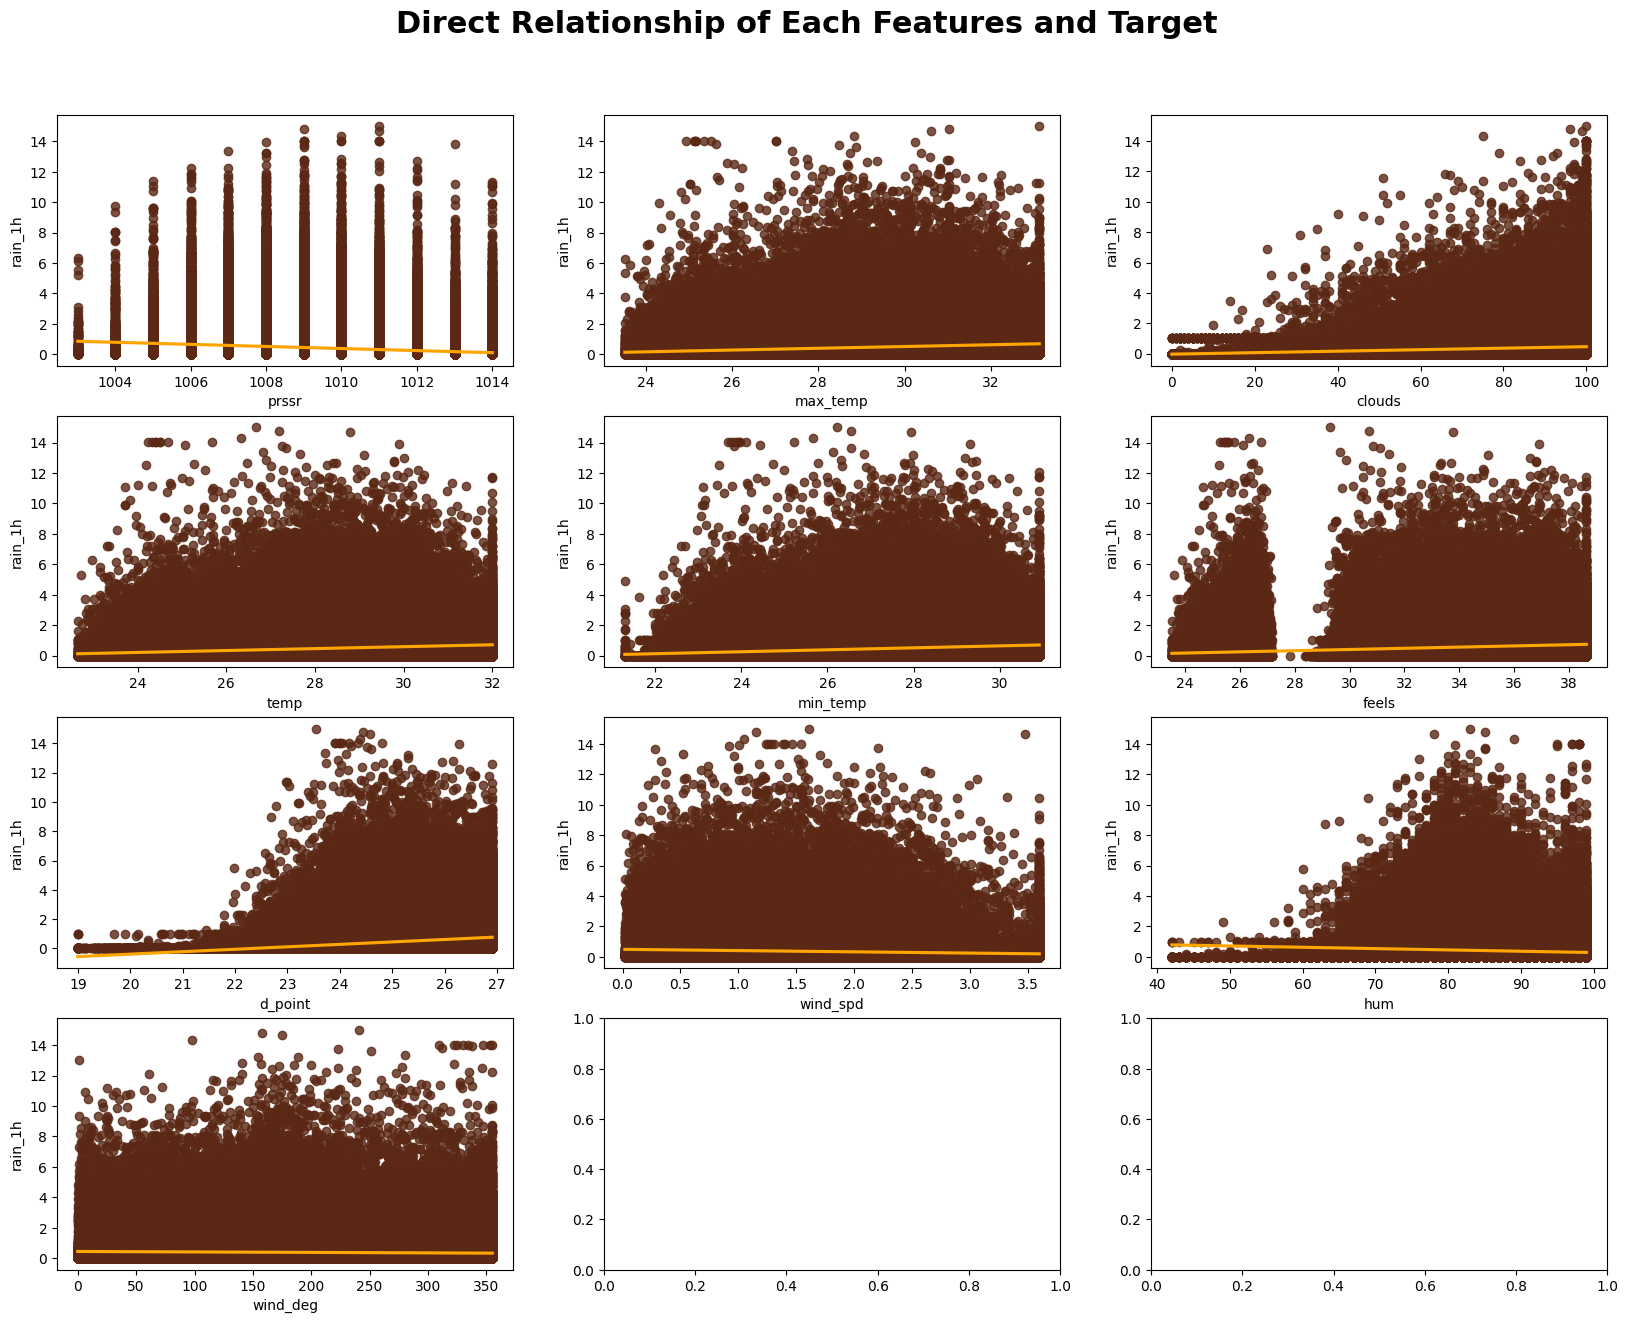

In [313]:
features = set(train.columns).difference({'rain_1h', 'datetime_iso','month','quarter','week_of_year'})
features = list(features)
fig, axes = plt.subplots(len(features)//3+1,3,figsize=(20,15))

f = 0
for axs in axes:
    for ax in axs:
        if f == len(features): break
        sns.regplot(x=features[f],y='rain_1h',data=train1,color='#5a2815',line_kws={'color':'orange'},ax=ax)
        f += 1

fig.suptitle('Direct Relationship of Each Features and Target',y=0.95,fontsize=22,fontweight='bold')        
plt.show()

After taking a close look at the relationship between our target variable and each feature, it's clear that there aren't any straightforward linear connections to be found. So, traditional linear models might not be the best fit here. Instead, we're leaning towards non-linear models and tree-based models. These models have the flexibility to capture and exploit the intricate, non-linear patterns and interactions within the data, potentially offering superior predictive performance for this specific dataset.

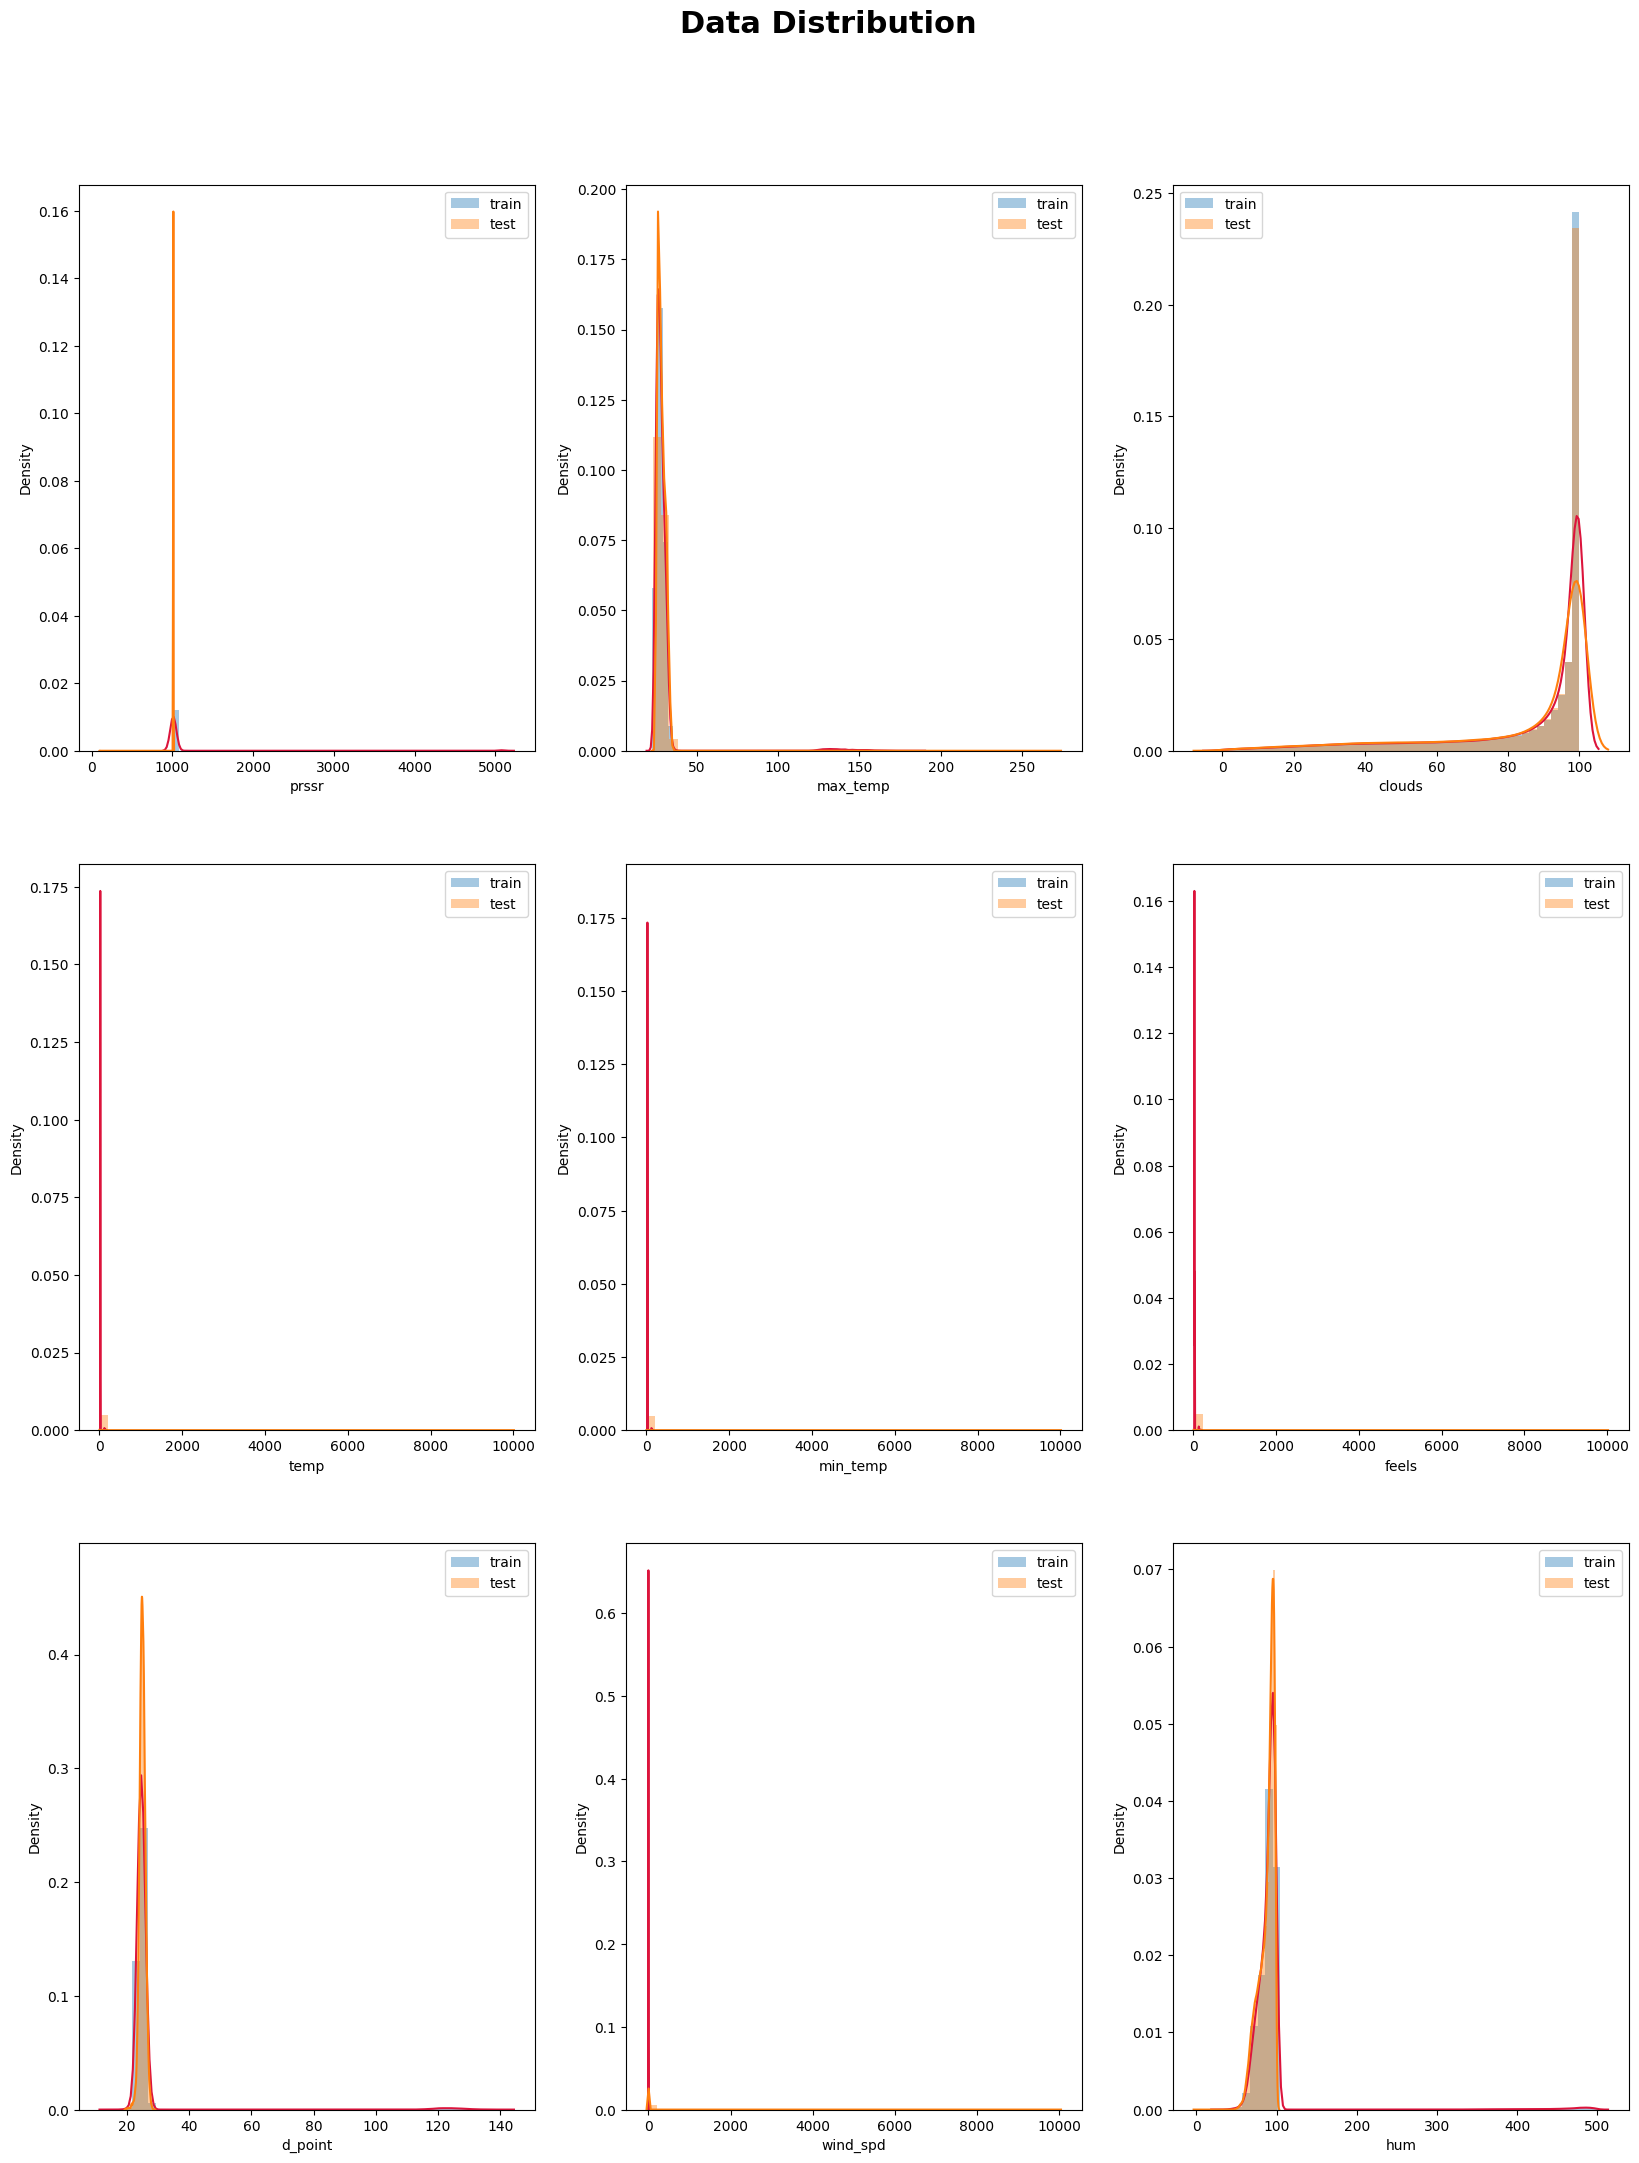

In [314]:
features = set(train.columns).difference({'rain_1h', 'datetime_iso','month','quarter','week_of_year'})
features = list(features)
fig, axes = plt.subplots(len(features)//3,3,figsize=(20,25))

f = 0
for axs in axes:
    for ax in axs:
        if f == len(features): break
        sns.distplot(train[features[f]],ax=ax,label='train')
#         sns.distplot(train1[features[f]],ax=ax,label='train (winsorized)')
        sns.distplot(test[features[f]],ax=ax,label='test').lines[0].set_color('crimson')
#         sns.distplot(test1[features[f]],ax=ax,label='test (winsorized)').lines[0].set_color('crimson')

        ax.legend()
        f += 1
        
fig.suptitle('Data Distribution',fontsize=22,fontweight='bold',y=0.95)
plt.show()

As we can see, outliers really affecting the distribution of our training and test data and can affect our model.

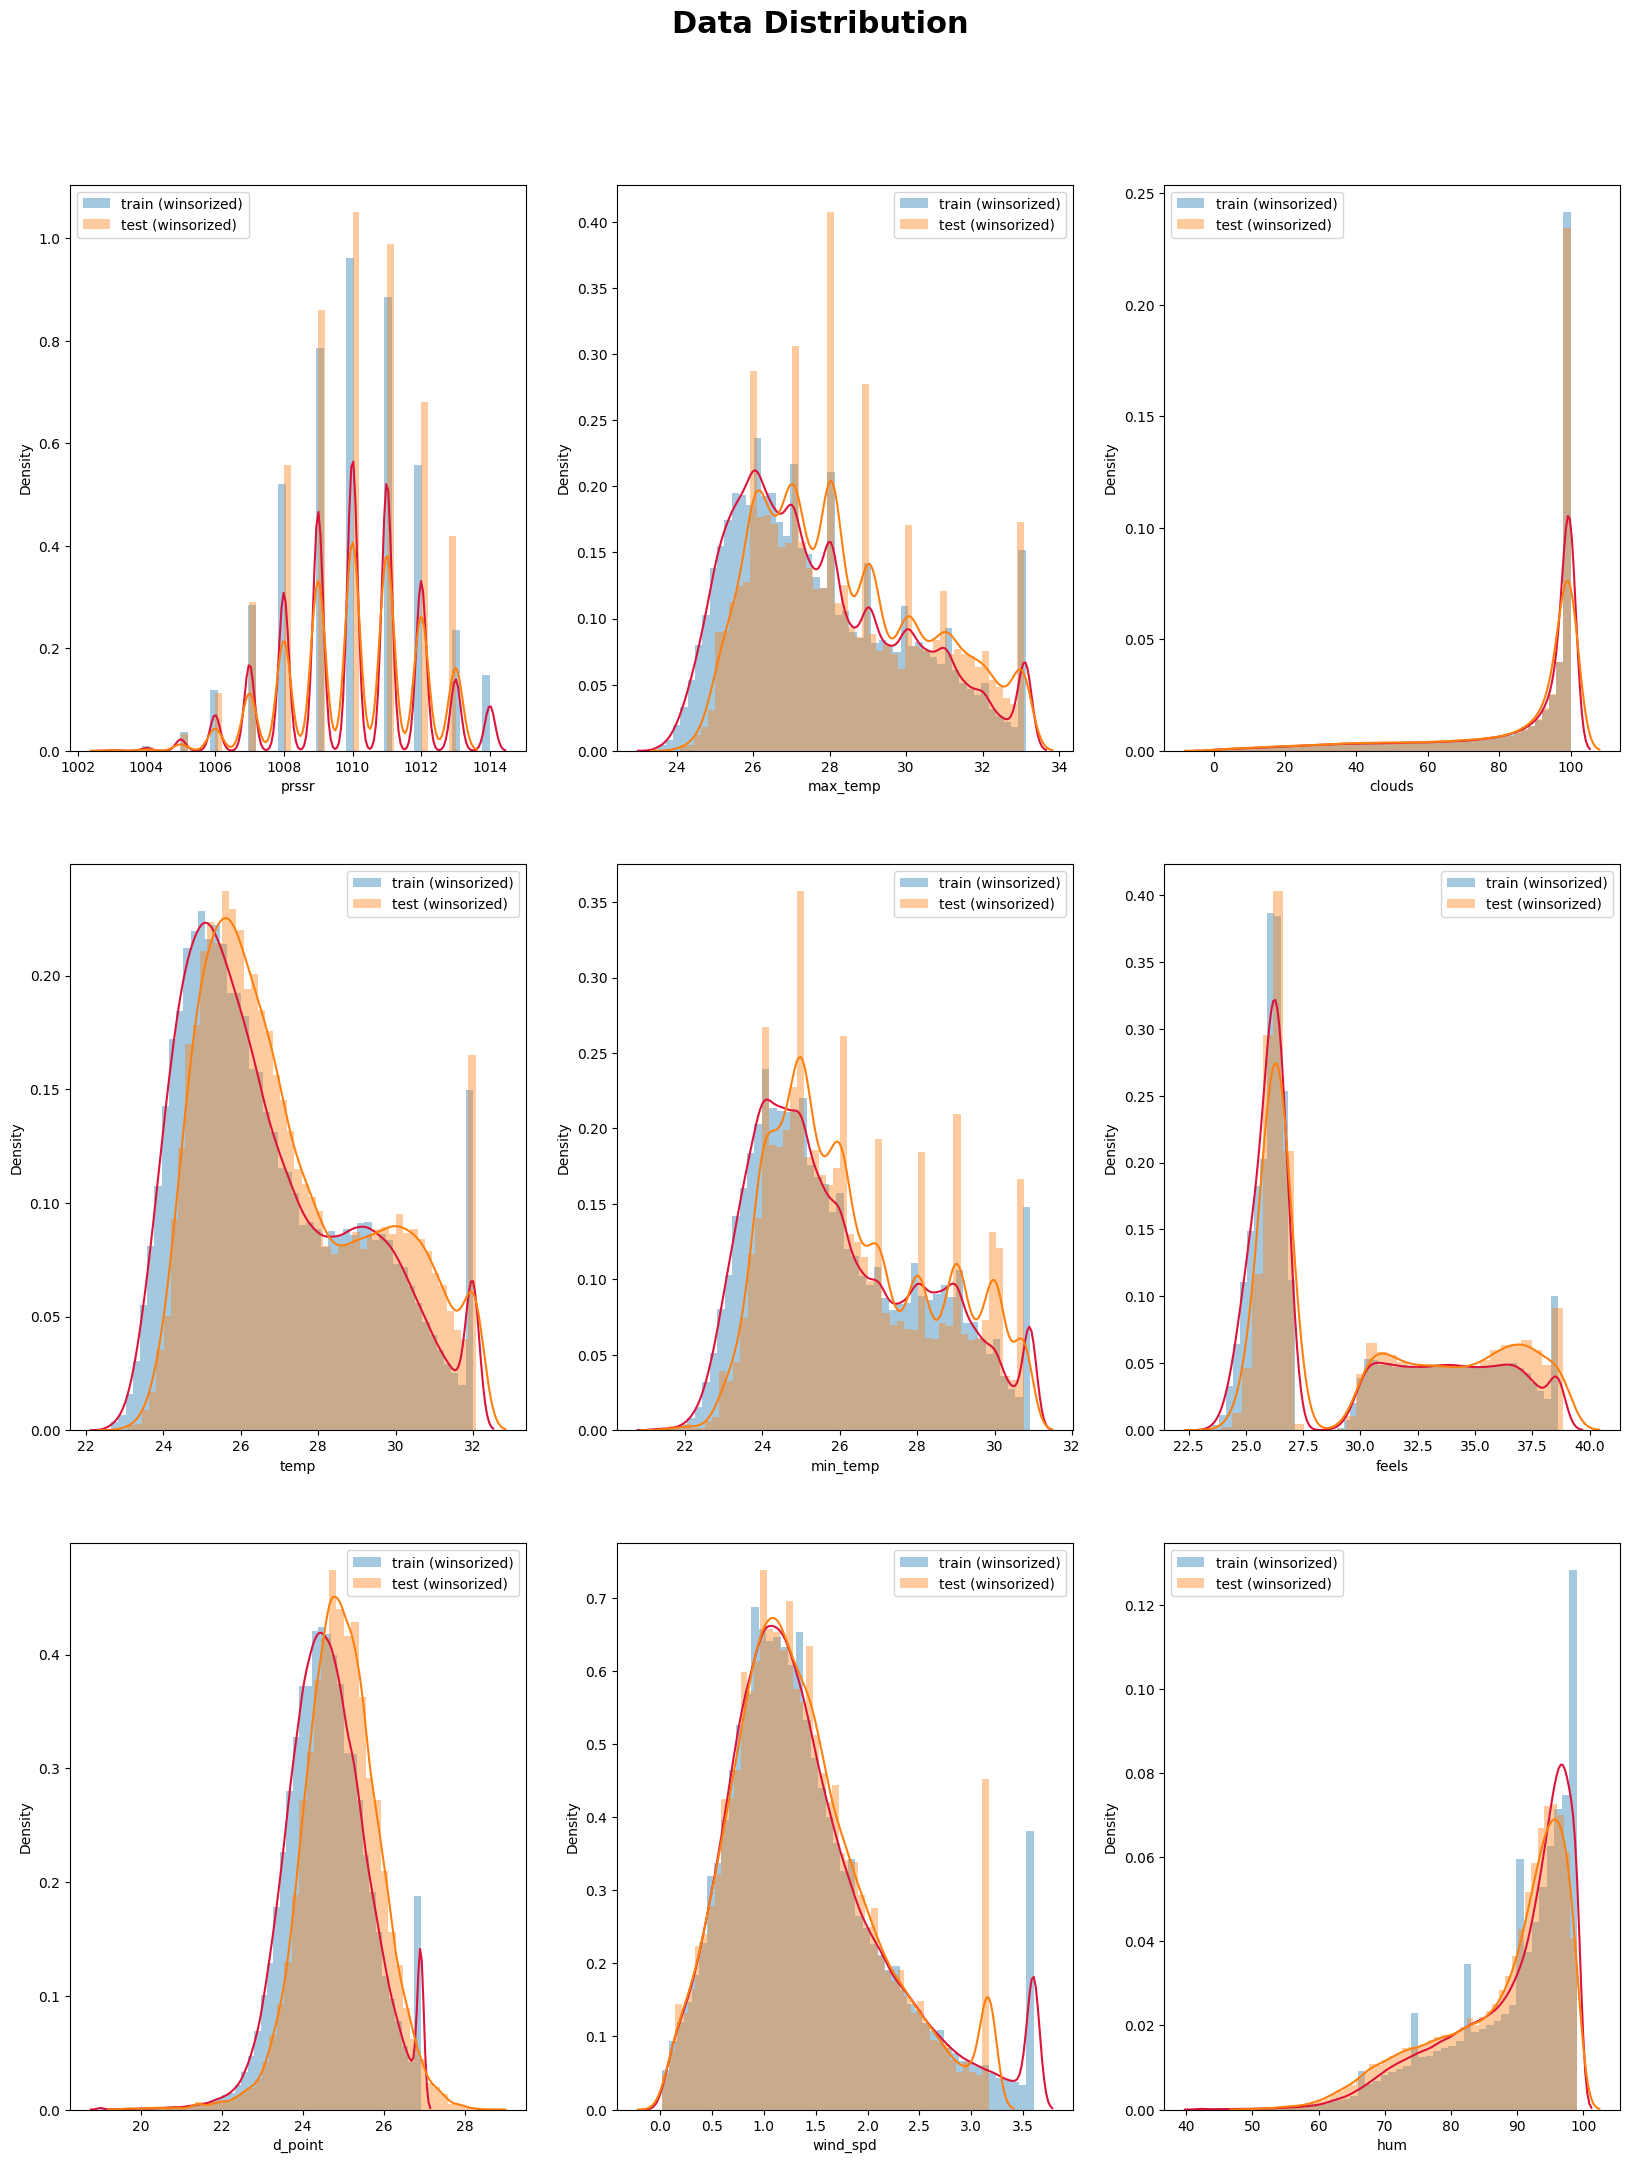

In [315]:
features = set(train.columns).difference({'rain_1h', 'datetime_iso','month','quarter','week_of_year'})
features = list(features)
fig, axes = plt.subplots(len(features)//3,3,figsize=(20,25))

f = 0
for axs in axes:
    for ax in axs:
        if f == len(features): break
#         sns.distplot(train[features[f]],ax=ax,label='train')
        sns.distplot(train1[features[f]],ax=ax,label='train (winsorized)')
#         sns.distplot(test[features[f]],ax=ax,label='test').lines[0].set_color('crimson')
        sns.distplot(test1[features[f]],ax=ax,label='test (winsorized)').lines[0].set_color('crimson')

        ax.legend()
        f += 1
        
fig.suptitle('Data Distribution',fontsize=22,fontweight='bold',y=0.95)
plt.show()

Now our distribution between train and test sets looks a lot more better. Then we can proceed to the next step

In [316]:
train = train1
test = test1

In [317]:
train.describe()

temp        d_point          feels       min_temp  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       26.755430      24.603917      29.454458      25.989055   
std         2.234161       1.003063       4.436969       2.175351   
min        22.650000      18.994698      23.520000      21.294698   
25%        24.980000      23.950000      25.990000      24.250000   
50%        26.200000      24.570000      26.650000      25.480000   
75%        28.390000      25.240000      33.370000      27.640000   
max        32.000000      26.910000      38.630000      30.920000   

            max_temp          prssr            hum       wind_spd  \
count  341880.000000  341880.000000  341880.000000  341880.000000   
mean       27.759501    1009.976887      88.997716       1.416392   
std         2.269555       1.890996       9.383725       0.766278   
min        23.520000    1003.000000      42.000000       0.020000   
25%        25.970000    1009.000000      83.000000       0.880000   
50%        27.270000    1010.000000      92.000000       1.270000   
75%        29.310000    1011.000000      96.000000       1.800000   
max        33.120000    1014.000000      99.000000       3.600000   

            wind_deg        rain_1h        clouds         month  \
count  341880.000000  341880.000000  341880.00000  341880.00000   
mean      200.818135       0.378405      85.44976       6.52285   
std        96.632458       0.941831      22.80106       3.44873   
min         0.000000       0.000000       0.00000       1.00000   
25%       149.000000       0.000000      81.00000       4.00000   
50%       203.000000       0.000000      97.00000       7.00000   
75%       279.000000       0.270000     100.00000      10.00000   
max       355.000000      15.000000     100.00000      12.00000   

             quarter   week_of_year  
count  341880.000000  341880.000000  
mean        2.508529      26.591155  
std         1.117092      15.062641  
min         1.000000       1.000000  
25%         2.000000      14.000000  
50%         3.000000      27.000000  
75%         4.000000      40.000000  
max         4.000000      53.000000

In [318]:
test.describe()

temp       d_point         feels      min_temp      max_temp  \
count  49368.000000  49367.000000  49368.000000  49368.000000  49368.000000   
mean      27.283105     24.934560     30.427493     26.384348     28.348857   
std        2.207848      0.941582      4.606885      2.075413      2.162693   
min       23.073417     19.510000     23.927592     21.600000     24.096835   
25%       25.510000     24.340000     26.270000     24.760000     26.600000   
50%       26.710000     24.920000     29.890000     25.950000     28.040000   
75%       29.000000     25.530000     34.770000     28.020000     30.020000   
max       32.070000     28.670000     38.830000     30.770000     33.070000   

              prssr           hum      wind_spd      wind_deg        clouds  \
count  49368.000000  49368.000000  49368.000000  49368.000000  49368.000000   
mean    1010.019831     87.642582      1.373683    201.646937     84.822800   
std        1.795428      9.841399      0.684806     90.840439     23.233429   
min     1003.000000     50.000000      0.023418      0.000000      0.000000   
25%     1009.000000     82.000000      0.890000    156.000000     80.000000   
50%     1010.000000     91.000000      1.270000    206.000000     97.000000   
75%     1011.000000     95.000000      1.760000    270.000000    100.000000   
max     1013.000000     99.000000      3.170000    350.000000    100.000000   

              month       quarter  week_of_year  
count  49368.000000  49368.000000  49368.000000  
mean       6.279047      2.432183     25.520175  
std        3.402672      1.103942     14.867011  
min        1.000000      1.000000      1.000000  
25%        3.000000      1.000000     13.000000  
50%        6.000000      2.000000     25.000000  
75%        9.000000      3.000000     38.000000  
max       12.000000      4.000000     53.000000

In [319]:
train['rain_1h']

0         0.00
1         0.00
2         0.00
3         0.13
4         0.34
          ... 
341875    0.00
341876    0.00
341877    0.00
341878    0.30
341879    0.19
Name: rain_1h, Length: 341880, dtype: float64

<Axes: >

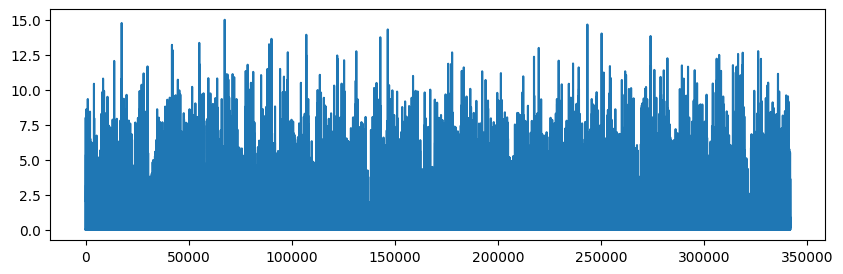

In [320]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

plt.rcParams["figure.figsize"] = (10,3)
train['rain_1h'].plot()

### Heatmap Plot

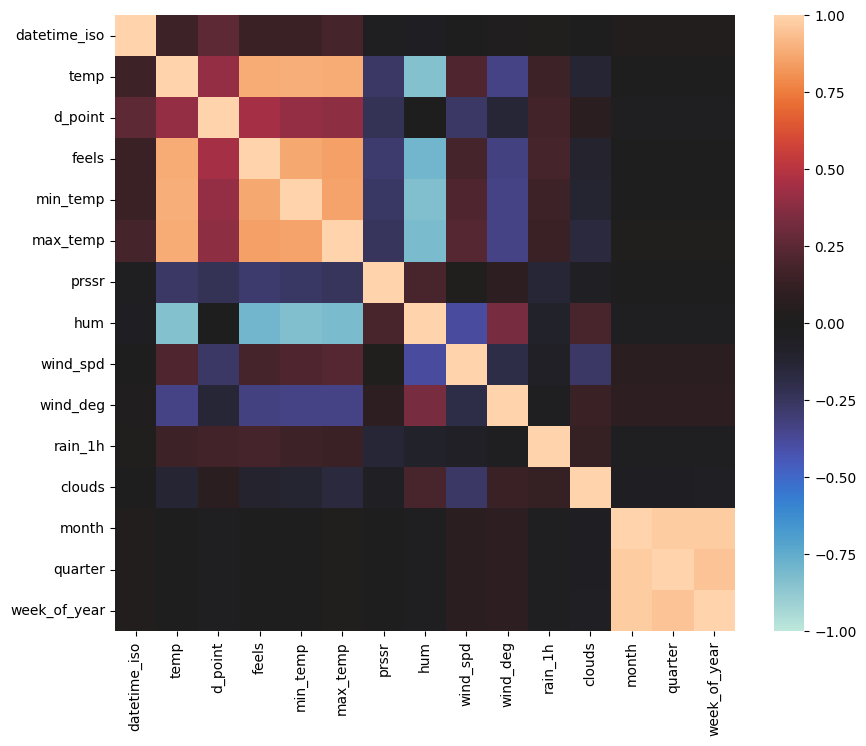

In [321]:
# train.reset_index(drop=True, inplace=True)

fig = plt.subplots(figsize=(10, 8)) 
corr = train.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0)
plt.show()

In our analysis, we have identified significant correlations between the target feature and numerous features within our dataset. Rather than discarding any of these features, we have made the strategic choice to incorporate all available features into our model. This decision is driven by the belief that each feature may contribute valuable information to the predictive power of our model. By including all relevant features, we aim to capture a comprehensive representation of the underlying patterns and relationships within the data, ultimately enhancing the model's ability to make accurate predictions.

### Feature Engineering

We did several feature engineering in our data. Here is the breakdown of each method

#### Log Transform

As we observed in the previous section, some of the data exhibit skewed distributions, and there are also outliers present. To address these issues, we will perform a log transformation to achieve an interpretable scale and normalize the dataset.

#### Feature Shift and Lag

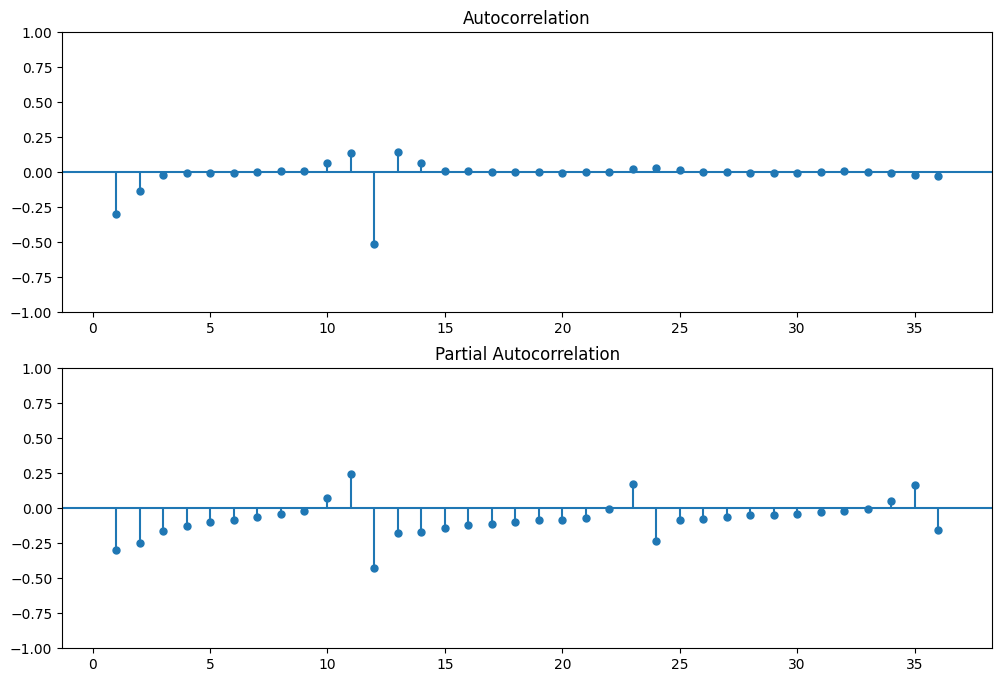

In [322]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
life_diff = train.rain_1h.diff(12).diff(1).dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(life_diff, zero=False, ax=ax[0],lags=36)
plot_pacf(life_diff, zero=False, ax=ax[1],lags=36)
plt.show()

In the ACF plot, significant spikes or peaks beyond a certain lag indicate the number of lag terms to consider for moving average (MA) components in a model like ARIMA. The lag where the ACF plot crosses the significance threshold is a candidate for the order of the MA term.

In the PACF plot, significant spikes beyond a certain lag indicate the number of lag terms to consider for autoregressive (AR) components. The lag where the PACF plot crosses the significance threshold is a candidate for the order of the AR term.

##### Feature Shift


This method allow us to create lagged data. This method works by iterates through different shift periods and numeric columns. It will generate new columns that represent future and past changes. Time series data often exhibits autocorrelation. That means value at one step is related to values at previous time steps. I will make the model consider past and future values when making prediction

##### Lag

This method enriches the dataset by generating lagged rolling mean features, capturing temporal dependencies, smoothing noisy data, and revealing seasonality and trends. By calculating the rolling mean within a centered window for each time point, it provides historical information that is essential for making accurate predictions and understanding the underlying patterns in the data. 

#### Seasonal Decompose

We used seasonal decomposition to break down the data into four components: observed, trend, seasonal, and decompose. We selected several periods—4320 (6 months), 2920 (4 months), and 2190 (3 months)—for specific reasons. In Indonesia, the location identified from the 'datetime_iso' data, there are two primary seasons: the rainy season and the dry season.

We chose a period of 4320 because it aligns well with the duration of one season. With this choice, we can capture a complete cycle of one season, allowing us to identify and separate the seasonal component for each cycle.

The periods of 2920 and 2190 were selected to focus on shorter-term seasonality and patterns. These periods enable us to identify transitions between phases of the rainy and dry seasons within a year.

In summary, we utilized seasonal decomposition with varying periods to gain insights into the seasonal patterns in Indonesia's climate. The choice of period was driven by the need to capture both long-term and short-term seasonality, providing a comprehensive view of weather variations in the region.

#### Cyclical Encoding

The goal of this method is to represent these cyclical features in a way that captures their temporal relationships while avoiding issues like discontinuities at the boundaries

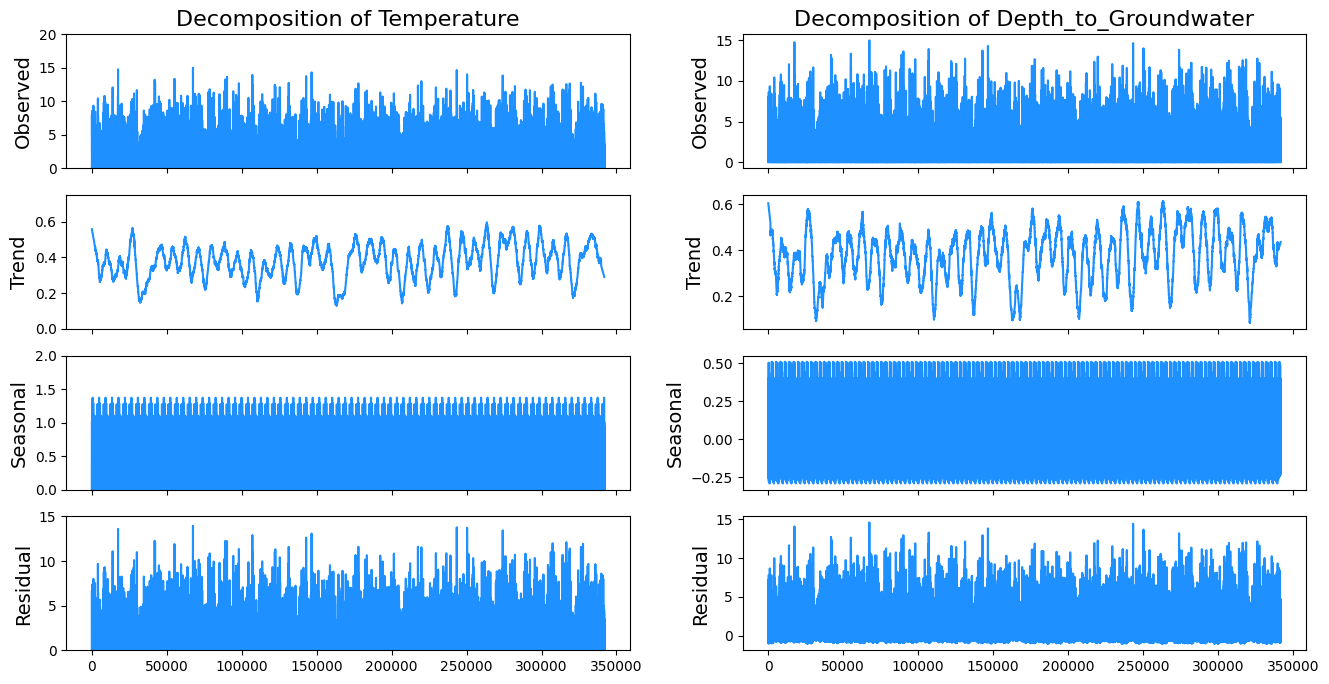

In [323]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(train.rain_1h, period=4320, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Temperature', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)
ax[0,0].set_ylim([0, 20])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)
ax[1,0].set_ylim([0, 0.75])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)
ax[2,0].set_ylim([0, 2])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)
ax[3,0].set_ylim([0, 15])

ax[0,1].set_title('Decomposition of Depth_to_Groundwater', fontsize=16)
res = seasonal_decompose(train.rain_1h, period=2920, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

(0.0, 20.0)

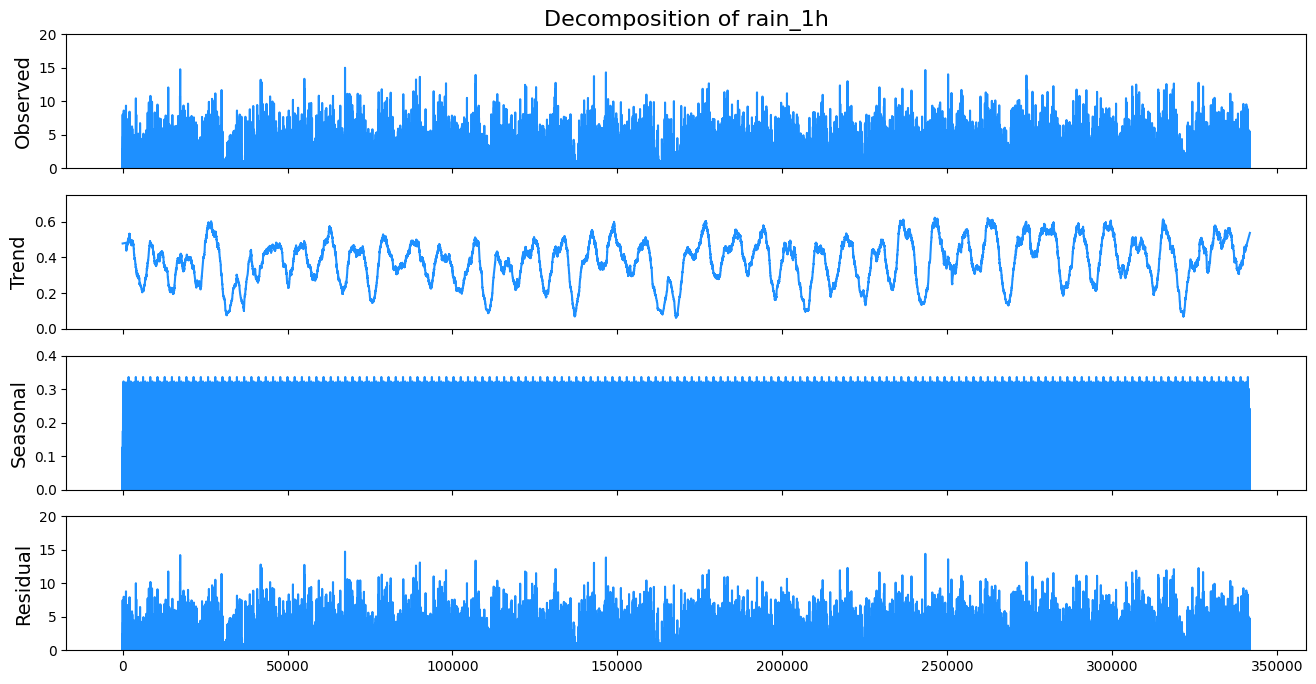

In [324]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16, 8))
res = seasonal_decompose(train.rain_1h, period=2190, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of rain_1h', fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
ax[0].set_ylim([0, 20])

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)
ax[1].set_ylim([0, 0.75])

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
ax[2].set_ylim([0, 0.4])

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
ax[3].set_ylim([0, 20])

In [334]:
numeric_col = [ 'temp','d_point','feels','min_temp','max_temp','prssr','hum', 'wind_spd','wind_deg']
shift_periods = [1,2,12,24,4320]
lags = [1,2,3,12,24,4320]

In [335]:
from statsmodels.tsa.seasonal import seasonal_decompose

def boxcox_transform(df):
    for col in numeric_col:
#         df[col], _ = yeojohnson(df[col])
        df[col] = np.log1p(df[col])
#         df[col] = boxcox(df[col])
    
    return df.copy()

def feat_shift(df):
    for p in shift_periods:
        for col in numeric_col:
            # Convert the column to a numeric data type if it's not already
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
            df[col + "+" + str(p)] = df[col] - df[col].shift(periods=p, fill_value=0)
            df[col + "-" + str(p)] = df[col] - df[col].shift(periods=-p, fill_value=0)
            
    return df.copy()


def season_decomp(df):
    for col in numeric_col:
        for p in [2190, 2920, 4320]:
            decomp = seasonal_decompose(train[col], period=p, model='additive', extrapolate_trend='freq')
            df[f"{col}_{p}_seasonal"] = decomp.seasonal
            df[f"{col}_{p}_seasonal"] = df[f"{col}_{p}_seasonal"].fillna(df[f"{col}_{p}_seasonal"].mean())
    return df.copy()


def feat_lag(df):
    for l in lags:
        for v in numeric_col:
            m=df[f"{v}"].mean()
            s=df[f"{v}"].std()
            mx=df[f"{v}"].mean()+df[f"{v}"].std()
            mi=df[f"{v}"].mean()-df[f"{v}"].std()

            df["mean{0}L{1}".format(v,l)] = df[f"{v}"].rolling(window=l, center=True).mean().fillna(m)
    return df.copy()

def cyclical_encoding(df):
    # Assuming 'Month' ranges from 1 to 12
    df['month_sin'] = np.sin(df['month'] * (2 * np.pi / 12))
    df['month_cos'] = np.cos(df['month'] * (2 * np.pi / 12))
    df['quarter_sin'] = np.sin(df['month'] * (2 * np.pi / 4))
    df['quarter_cos'] = np.cos(df['month'] * (2 * np.pi / 4))
    df['week_sin'] = np.sin(df['month'] * (2 * np.pi / 52))
    df['week_cos'] = np.cos(df['month'] * (2 * np.pi / 52))
    
    return df.copy()

In [336]:
X = boxcox_transform(train.copy())
X = feat_shift(X.copy())
X = season_decomp(X.copy())
X = feat_lag(X.copy())
# X = cyclical_encoding(X.copy())


X['rain_1h'] = X['rain_1h'].interpolate()
X['rain_1h'] = X['rain_1h'].fillna(method='bfill')

y = np.log1p(X[["rain_1h"]])
X.drop(["rain_1h"], axis=1, inplace=True)

X_test = boxcox_transform(test.copy())
X_test = feat_shift(X_test.copy())
X_test = season_decomp(X_test.copy())
X_test = feat_lag(X_test.copy())
# X_test = cyclical_encoding(X_test.copy())


X.drop('datetime_iso', axis=1, inplace=True)
X_test.drop('datetime_iso', axis=1, inplace=True)

In [337]:
X_test

temp   d_point     feels  min_temp  max_temp     prssr       hum  \
0      3.317453  3.205182  3.317453  3.296577  3.337903  6.917706  4.442651   
1      3.314550  3.255015  3.314550  3.298057  3.368674  6.917706  4.521789   
2      3.390473  3.285038  3.574590  3.368330  3.411148  6.917706  4.442651   
3      3.395850  3.267666  3.569814  3.385068  3.403860  6.916715  4.406719   
4      3.425890  3.243373  3.594019  3.411478  3.452207  6.915723  4.317488   
...         ...       ...       ...       ...       ...       ...       ...   
49363  3.233567  3.192121  3.270329  3.165475  3.374169  6.919684  4.553877   
49364  3.213662  3.178887  3.249987  3.131573  3.367641  6.919684  4.564348   
49365  3.213662  3.178887  3.249987  3.131573  3.367641  6.919684  4.564348   
49366  3.213662  3.178887  3.249987  3.131573  3.367641  6.919684  4.564348   
49367  3.316728  3.153590  3.316728  3.279030  3.362110  6.920672  4.369448   

       wind_spd  wind_deg  clouds  ...  meanwind_degL24  meantempL4320  \
0      0.896088  5.860786    97.0  ...         5.103518        3.33929   
1      0.982078  5.860786    95.0  ...         5.103518        3.33929   
2      1.000632  5.846439    90.0  ...         5.103518        3.33929   
3      0.912283  5.828946    91.0  ...         5.103518        3.33929   
4      0.871293  5.828946    96.0  ...         5.103518        3.33929   
...         ...       ...     ...  ...              ...            ...   
49363  0.943906  5.480639    84.0  ...         5.103518        3.33929   
49364  0.928219  5.463832    70.0  ...         5.103518        3.33929   
49365  0.928219  5.463832    70.0  ...         5.103518        3.33929   
49366  0.928219  5.463832    70.0  ...         5.103518        3.33929   
49367  1.141033  5.356586    87.0  ...         5.103518        3.33929   

       meand_pointL4320  meanfeelsL4320  meanmin_tempL4320  meanmax_tempL4320  \
0              3.254911        3.437222           3.307157           3.376588   
1              3.254911        3.437222           3.307157           3.376588   
2              3.254911        3.437222           3.307157           3.376588   
3              3.254911        3.437222           3.307157           3.376588   
4              3.254911        3.437222           3.307157           3.376588   
...                 ...             ...                ...                ...   
49363          3.254911        3.437222           3.307157           3.376588   
49364          3.254911        3.437222           3.307157           3.376588   
49365          3.254911        3.437222           3.307157           3.376588   
49366          3.254911        3.437222           3.307157           3.376588   
49367          3.254911        3.437222           3.307157           3.376588   

       meanprssrL4320  meanhumL4320  meanwind_spdL4320  meanwind_degL4320  
0            6.918713      4.477841           0.823708           5.103518  
1            6.918713      4.477841           0.823708           5.103518  
2            6.918713      4.477841           0.823708           5.103518  
3            6.918713      4.477841           0.823708           5.103518  
4            6.918713      4.477841           0.823708           5.103518  
...               ...           ...                ...                ...  
49363        6.918713      4.477841           0.823708           5.103518  
49364        6.918713      4.477841           0.823708           5.103518  
49365        6.918713      4.477841           0.823708           5.103518  
49366        6.918713      4.477841           0.823708           5.103518  
49367        6.918713      4.477841           0.823708           5.103518  

[49368 rows x 184 columns]

In [338]:
X

temp   d_point     feels  min_temp  max_temp     prssr       hum  \
0       3.248435  3.214466  3.286908  3.230014  3.266522  6.920672  4.564348   
1       3.241811  3.208017  3.279783  3.218476  3.268047  6.920672  4.564348   
2       3.317816  3.221273  3.317816  3.299534  3.346037  6.920672  4.465908   
3       3.343215  3.233567  3.462606  3.317453  3.379633  6.920672  4.442651   
4       3.346741  3.260018  3.482470  3.317091  3.377929  6.919684  4.477337   
...          ...       ...       ...       ...       ...       ...       ...   
341875  3.260402  3.240637  3.679586  3.236323  3.284289  6.915723  4.584967   
341876  3.239071  3.225653  3.280159  3.214466  3.263084  6.914731  4.595120   
341877  3.243764  3.230409  3.679586  3.218876  3.529884  6.915723  4.595120   
341878  3.320710  3.246880  3.426215  3.258865  3.341093  6.916715  4.499810   
341879  3.313822  3.254243  3.313822  3.296577  3.335414  6.916715  4.521789   

        wind_spd  wind_deg  clouds  ...  meanwind_degL24  meantempL4320  \
0       0.598837  5.771441   100.0  ...         5.072107       3.320278   
1       0.672944  5.826000   100.0  ...         5.072107       3.320278   
2       0.797507  5.828946    99.0  ...         5.072107       3.320278   
3       0.732368  5.837730    94.0  ...         5.072107       3.320278   
4       0.620576  5.820083   100.0  ...         5.072107       3.320278   
...          ...       ...     ...  ...              ...            ...   
341875  0.641854  2.639057    99.0  ...         5.072107       3.320278   
341876  0.615186  3.091042   100.0  ...         5.072107       3.320278   
341877  0.932164  3.295837    97.0  ...         5.072107       3.320278   
341878  0.900161  2.890372    98.0  ...         5.072107       3.320278   
341879  0.940007  1.945910    99.0  ...         5.072107       3.320278   

        meand_pointL4320  meanfeelsL4320  meanmin_tempL4320  \
0               3.241974        3.406122           3.292258   
1               3.241974        3.406122           3.292258   
2               3.241974        3.406122           3.292258   
3               3.241974        3.406122           3.292258   
4               3.241974        3.406122           3.292258   
...                  ...             ...                ...   
341875          3.241974        3.406122           3.292258   
341876          3.241974        3.406122           3.292258   
341877          3.241974        3.406122           3.292258   
341878          3.241974        3.406122           3.292258   
341879          3.241974        3.406122           3.292258   

        meanmax_tempL4320  meanprssrL4320  meanhumL4320  meanwind_spdL4320  \
0                3.355932        6.918671      4.493756           0.835141   
1                3.355932        6.918671      4.493756           0.835141   
2                3.355932        6.918671      4.493756           0.835141   
3                3.355932        6.918671      4.493756           0.835141   
4                3.355932        6.918671      4.493756           0.835141   
...                   ...             ...           ...                ...   
341875           3.355932        6.918671      4.493756           0.835141   
341876           3.355932        6.918671      4.493756           0.835141   
341877           3.355932        6.918671      4.493756           0.835141   
341878           3.355932        6.918671      4.493756           0.835141   
341879           3.355932        6.918671      4.493756           0.835141   

        meanwind_degL4320  
0                5.072107  
1                5.072107  
2                5.072107  
3                5.072107  
4                5.072107  
...                   ...  
341875           5.072107  
341876           5.072107  
341877           5.072107  
341878           5.072107  
341879           5.072107  

[341880 rows x 184 columns]

In [339]:
X_test.columns.to_list()

['temp',
 'd_point',
 'feels',
 'min_temp',
 'max_temp',
 'prssr',
 'hum',
 'wind_spd',
 'wind_deg',
 'clouds',
 'month',
 'quarter',
 'week_of_year',
 'temp+1',
 'temp-1',
 'd_point+1',
 'd_point-1',
 'feels+1',
 'feels-1',
 'min_temp+1',
 'min_temp-1',
 'max_temp+1',
 'max_temp-1',
 'prssr+1',
 'prssr-1',
 'hum+1',
 'hum-1',
 'wind_spd+1',
 'wind_spd-1',
 'wind_deg+1',
 'wind_deg-1',
 'temp+2',
 'temp-2',
 'd_point+2',
 'd_point-2',
 'feels+2',
 'feels-2',
 'min_temp+2',
 'min_temp-2',
 'max_temp+2',
 'max_temp-2',
 'prssr+2',
 'prssr-2',
 'hum+2',
 'hum-2',
 'wind_spd+2',
 'wind_spd-2',
 'wind_deg+2',
 'wind_deg-2',
 'temp+12',
 'temp-12',
 'd_point+12',
 'd_point-12',
 'feels+12',
 'feels-12',
 'min_temp+12',
 'min_temp-12',
 'max_temp+12',
 'max_temp-12',
 'prssr+12',
 'prssr-12',
 'hum+12',
 'hum-12',
 'wind_spd+12',
 'wind_spd-12',
 'wind_deg+12',
 'wind_deg-12',
 'temp+24',
 'temp-24',
 'd_point+24',
 'd_point-24',
 'feels+24',
 'feels-24',
 'min_temp+24',
 'min_temp-24',
 'max

In [340]:
X.columns.to_list()

['temp',
 'd_point',
 'feels',
 'min_temp',
 'max_temp',
 'prssr',
 'hum',
 'wind_spd',
 'wind_deg',
 'clouds',
 'month',
 'quarter',
 'week_of_year',
 'temp+1',
 'temp-1',
 'd_point+1',
 'd_point-1',
 'feels+1',
 'feels-1',
 'min_temp+1',
 'min_temp-1',
 'max_temp+1',
 'max_temp-1',
 'prssr+1',
 'prssr-1',
 'hum+1',
 'hum-1',
 'wind_spd+1',
 'wind_spd-1',
 'wind_deg+1',
 'wind_deg-1',
 'temp+2',
 'temp-2',
 'd_point+2',
 'd_point-2',
 'feels+2',
 'feels-2',
 'min_temp+2',
 'min_temp-2',
 'max_temp+2',
 'max_temp-2',
 'prssr+2',
 'prssr-2',
 'hum+2',
 'hum-2',
 'wind_spd+2',
 'wind_spd-2',
 'wind_deg+2',
 'wind_deg-2',
 'temp+12',
 'temp-12',
 'd_point+12',
 'd_point-12',
 'feels+12',
 'feels-12',
 'min_temp+12',
 'min_temp-12',
 'max_temp+12',
 'max_temp-12',
 'prssr+12',
 'prssr-12',
 'hum+12',
 'hum-12',
 'wind_spd+12',
 'wind_spd-12',
 'wind_deg+12',
 'wind_deg-12',
 'temp+24',
 'temp-24',
 'd_point+24',
 'd_point-24',
 'feels+24',
 'feels-24',
 'min_temp+24',
 'min_temp-24',
 'max

## Modelling
In the context of the Kaggle competition we're participating in, our approach and model selection hold particular significance. The competition dataset poses unique challenges, including a high dimensionality in both the training and test sets. This characteristic necessitates a thoughtful choice of predictive modeling technique to achieve accurate results.

After careful evaluation, we have chosen to utilize LightGBM (LGBM) as our primary predictive model. LGBM's selection is driven by its well-documented efficiency in handling high-dimensional data, which is prevalent in the competition dataset. This efficiency translates into faster training and inference, enabling us to iterate more swiftly and make informed decisions.

### Optuna : Hyperparamater optimization

We comment this code because we already saved the best paramater from optuna

In [341]:
# # Optuna parameters for each target (I change here only targets)
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import KFold
# import optuna
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error
# # import warnings
# # warnings.filterwarnings("ignore")

# def objective(trial, data = X, target = y):
    
#     params = {
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0001, 10.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 500),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'max_depth': trial.suggest_int('max_depth', 2, 50),
#         'n_estimators': trial.suggest_int('n_estimators', 500, 10000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'subsample': trial.suggest_float('subsample', 0.01, 0.1),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.6),
#         'min_data_per_group': trial.suggest_int('min_data_per_group', 1, 1000),
# #         'device_type': 'gpu',
#         'boosting_type': 'gbdt',
#         'random_state': 42,
# #         'bagging_freq': 1,
#         'metric': 'rmse'
#     }
    
#     model = LGBMRegressor(**params)
#     scores = []
#     k = KFold(n_splits = 3)
#     for i, (trn_idx, val_idx) in enumerate(k.split(X)):
        
#         X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

#         model.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False)
        
#         tr_preds = np.expm1(model.predict(X_train))
#         tr_preds[tr_preds < 0] = 0
#         tr_score = np.sqrt(mean_squared_error(np.expm1(y_train), tr_preds))
        
#         val_preds = np.expm1(model.predict(X_val))
#         val_preds[val_preds < 0] = 0
#         val_score = np.sqrt(mean_squared_error(np.expm1(y_val), val_preds))

#         scores.append((tr_score, val_score))
        
#         print(f"Fold {i} | RMSE: {val_score}")
        
        
#     scores = pd.DataFrame(scores, columns = ['train score', 'validation score'])
    
#     return scores['validation score'].mean()

# study = optuna.create_study(direction = 'minimize')
# study.optimize(objective, n_trials = 100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)
# print('Best value:', study.best_value)

In [342]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

# A list of feature importances
all_fi = []

splits = 11

# Initializing and filling predictions dataframe with datetime values
preds = pd.DataFrame()
preds["datetime_iso"] = test["datetime_iso"].copy()

# The months will be used for folds split
months = X['month']
n_splits = months.nunique()

tscv = TimeSeriesSplit(n_splits=splits)
kf = KFold(n_splits=splits)
logo = LeaveOneGroupOut()

oof_preds = np.zeros((X.shape[0],))

model_preds = 0
model_fi = 0

rs = RobustScaler()
X_scaled = X.copy()
X_scaled[X.columns] = rs.fit_transform(X)
test_scaled = rs.transform(X_test[X.columns])

parameters = {
     'n_estimators': 1000, #6844
    'reg_alpha': 0.3, #0.2944 
    'reg_lambda': 0.3, #0.3370
    'colsample_bytree': 0.75, #0.7433
    'subsample': 0.5, #0.5
    'learning_rate': 0.018, #0.0176
    'max_depth': 150, #106
    'num_leaves': 400,  #595
    'min_child_samples': 320, #390
    'nthread': -1,
    'metric': 'rmse',  # Evaluation metric (you can adjust this)
    'objective': 'regression',  # Loss function for regression
    'bagging_freq': 1, # Enable GPU acceleration on Kaggle
    'device': 'gpu'
}

for num, (train_idx, valid_idx) in enumerate(kf.split(X, months)):
    X_train, X_valid = X_scaled.loc[train_idx], X_scaled.loc[valid_idx]
    y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

    # Create a LightGBM regression model with additional parameters
    model = lgb.LGBMRegressor(**parameters, random_state=42)

    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False, early_stopping_rounds=500)
   
    model_preds += np.expm1(model.predict(test_scaled)) / splits
    oof_preds[valid_idx] = np.expm1(model.predict(X_valid))
    oof_preds[oof_preds < 0] = 0

    # Calculate RMSE for the fold
    rmse = np.sqrt(mean_squared_error(np.expm1(y_valid), oof_preds[valid_idx]))

    print(f"Fold {num} RMSE: {rmse}")

target_rmse = np.sqrt(mean_squared_error(np.expm1(y['rain_1h']), oof_preds))
print(f"\nOverall RMSE: {target_rmse}")

preds['rain_1h'] = model_preds
all_fi.append(dict(zip(X_test.columns, model.feature_importances_)))

Fold 0 RMSE: 0.700790801727692
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 1 RMSE: 0.6752341913609683
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 2 RMSE: 0.7171219578721809
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Fold 3 RMSE: 0.6721373936244055
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be 

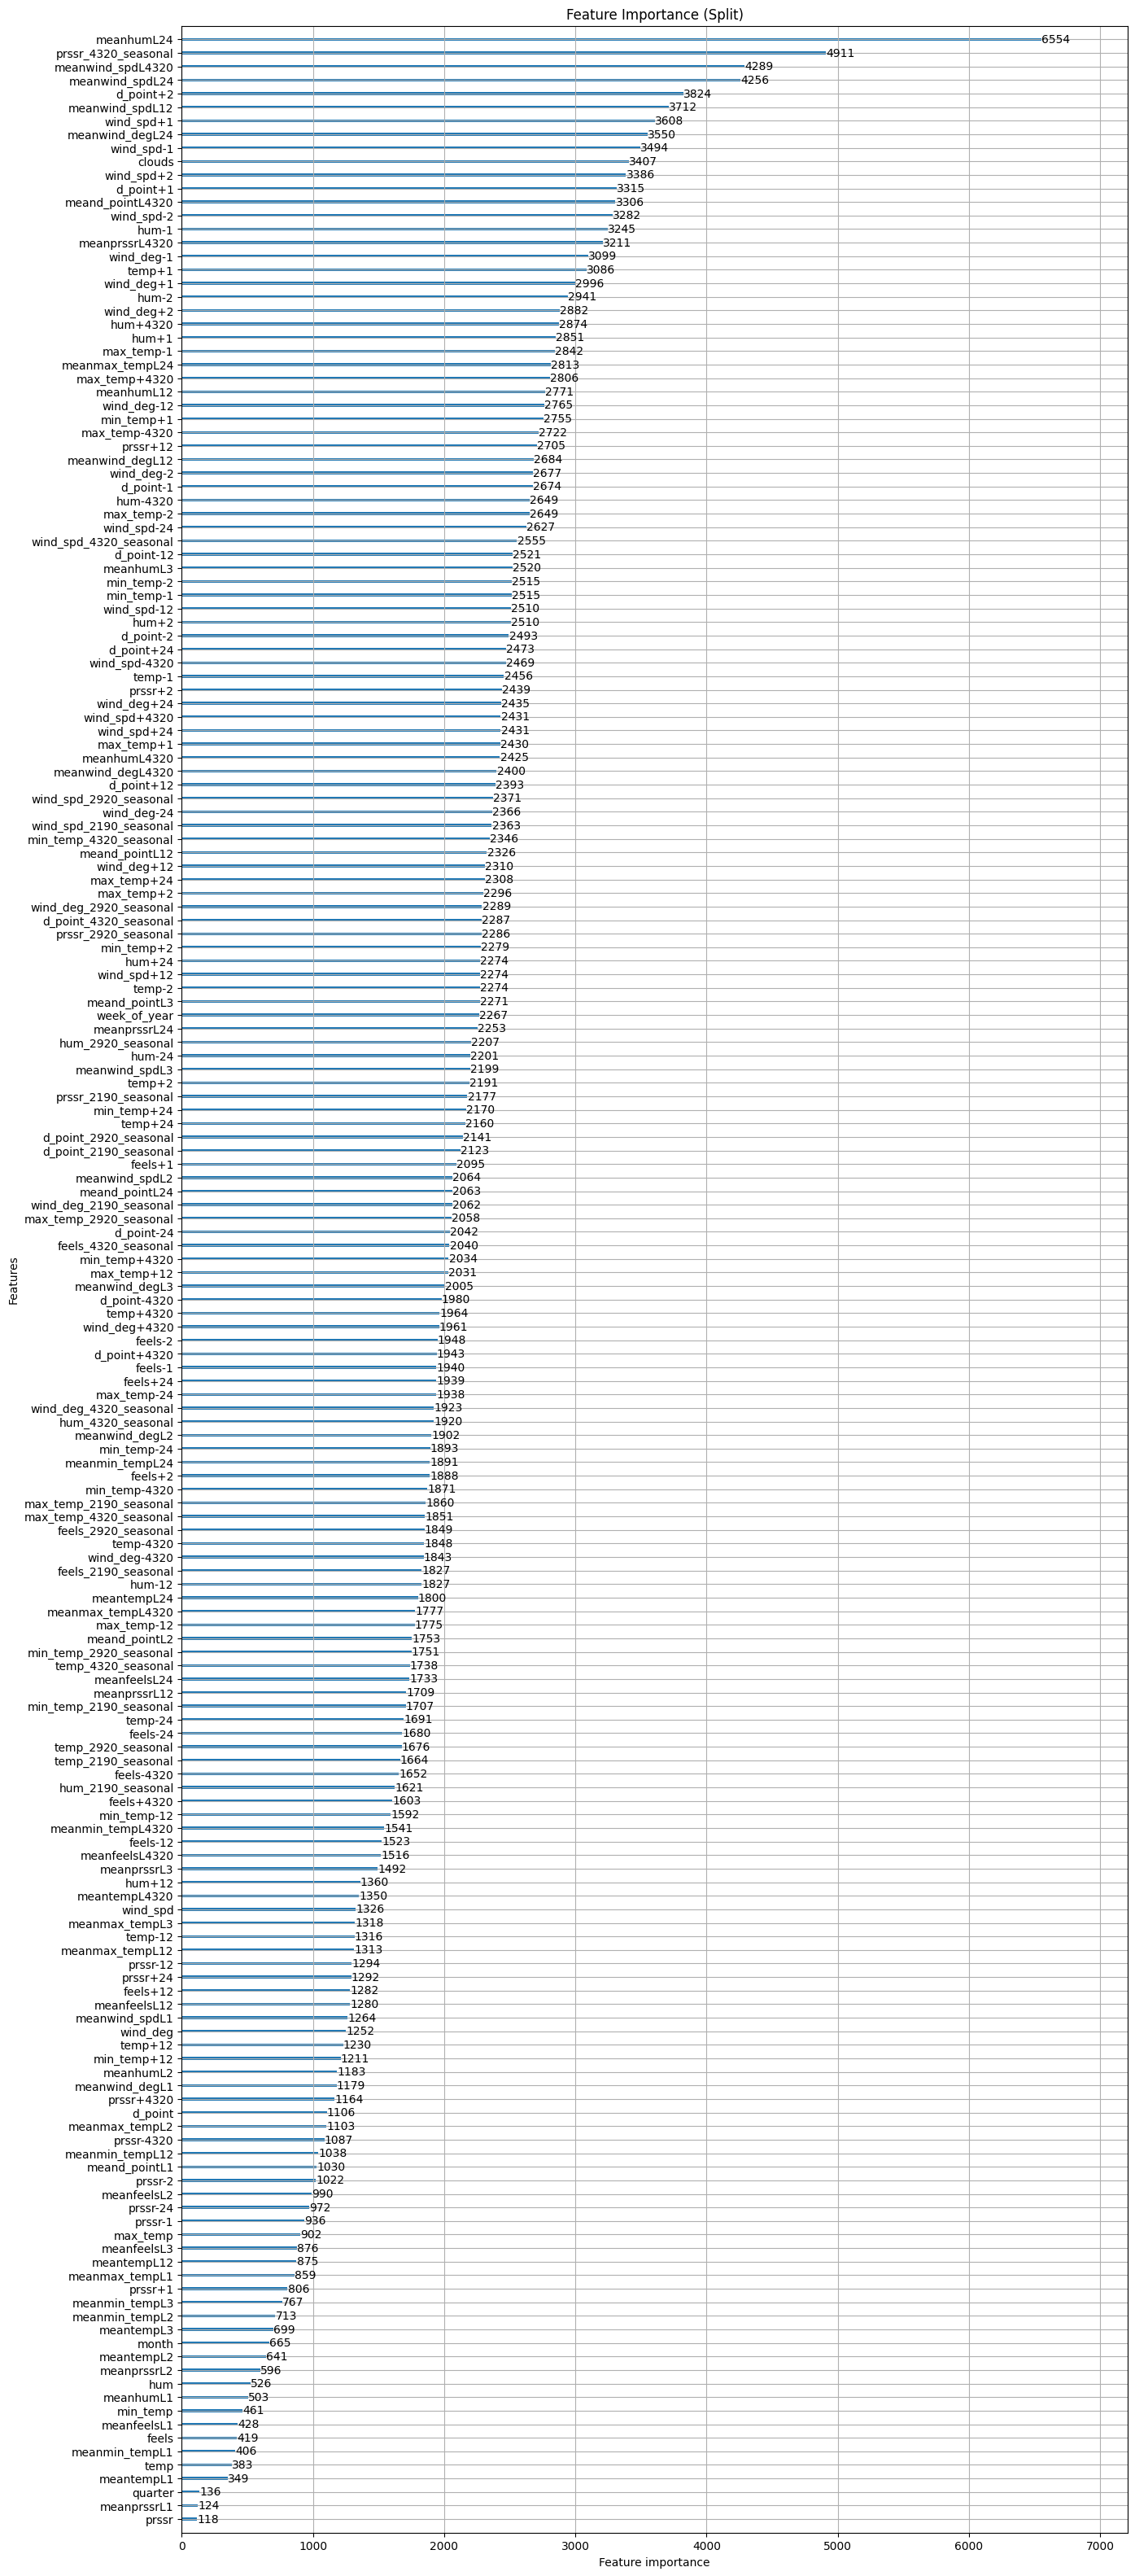

In [343]:
# You can plot feature importances if needed
fig, ax = plt.subplots(figsize=(15, 40))
lgb.plot_importance(model, ax=ax, importance_type='split', title='Feature Importance (Split)')
plt.show()

In [344]:
preds.head(50)

datetime_iso   rain_1h
0  2018-01-01 00:00:00+00:00  0.243061
1  2018-01-01 01:00:00+00:00  0.174370
2  2018-01-01 02:00:00+00:00  0.077773
3  2018-01-01 03:00:00+00:00  0.053918
4  2018-01-01 04:00:00+00:00  0.268628
5  2018-01-01 05:00:00+00:00  2.463682
6  2018-01-01 06:00:00+00:00  1.619229
7  2018-01-01 07:00:00+00:00  1.182344
8  2018-01-01 08:00:00+00:00  0.558042
9  2018-01-01 09:00:00+00:00  0.557764
10 2018-01-01 10:00:00+00:00  0.454349
11 2018-01-01 11:00:00+00:00  0.261503
12 2018-01-01 12:00:00+00:00  0.120533
13 2018-01-01 13:00:00+00:00  0.129057
14 2018-01-01 14:00:00+00:00  0.110307
15 2018-01-01 15:00:00+00:00  0.214528
16 2018-01-01 16:00:00+00:00  0.357214
17 2018-01-01 17:00:00+00:00  0.516883
18 2018-01-01 18:00:00+00:00  0.226527
19 2018-01-01 19:00:00+00:00  0.209809
20 2018-01-01 20:00:00+00:00  0.261071
21 2018-01-01 21:00:00+00:00  0.109346
22 2018-01-01 22:00:00+00:00  0.124837
23 2018-01-01 23:00:00+00:00  0.150737
24 2018-01-02 00:00:00+00:00  0.079860
25 2018-01-02 01:00:00+00:00  0.037113
26 2018-01-02 02:00:00+00:00  0.057786
27 2018-01-02 03:00:00+00:00  0.066640
28 2018-01-02 04:00:00+00:00  0.136394
29 2018-01-02 05:00:00+00:00  0.340133
30 2018-01-02 06:00:00+00:00  0.710391
31 2018-01-02 07:00:00+00:00  0.673125
32 2018-01-02 08:00:00+00:00  0.278355
33 2018-01-02 09:00:00+00:00  0.275704
34 2018-01-02 10:00:00+00:00  0.161794
35 2018-01-02 11:00:00+00:00  0.064960
36 2018-01-02 12:00:00+00:00  0.076745
37 2018-01-02 13:00:00+00:00  0.145622
38 2018-01-02 14:00:00+00:00  0.121443
39 2018-01-02 15:00:00+00:00  0.061232
40 2018-01-02 16:00:00+00:00  0.090649
41 2018-01-02 17:00:00+00:00  0.043582
42 2018-01-02 18:00:00+00:00  0.027758
43 2018-01-02 19:00:00+00:00  0.092039
44 2018-01-02 20:00:00+00:00  0.184144
45 2018-01-02 21:00:00+00:00  0.105107
46 2018-01-02 22:00:00+00:00  0.085950
47 2018-01-02 23:00:00+00:00  0.115294
48 2018-01-03 00:00:00+00:00  0.128229
49 2018-01-03 01:00:00+00:00  0.209188

In [345]:
import pickle

file = 'modelAkhir_TrahGanjill.pkl'
pickle.dump(model, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!


In [346]:
pickle.dump(model,open("modelAkhir_TrahGanjil.h5","wb"))

In [347]:
X_scaled['rain_1h'] = y

In [348]:
X_scaled.to_csv ('train_data.csv', index=False)

In [349]:
test_scaled_df = pd.DataFrame(test_scaled, columns=X.columns)  # Assuming X.columns represents the column names

# Save the DataFrame to a CSV file
test_scaled_df.to_csv('test_data.csv', index=False)

### Post Processing: Weighted Adjustment for Enhanced Model Performance
Following a comprehensive evaluation of our model's predictions, we have identified an opportunity for refinement through the strategic application of weight multipliers. These weight multipliers are designed to fine-tune the prediction outputs, making them more aligned with the actual observed values. In this crucial post-processing phase, we embark on a systematic search for the optimal weight coefficients. By finding the most suitable weights, we aim to significantly enhance the predictive power and overall performance of our model, ultimately leading to more accurate and reliable forecasts in our data-driven tasks.

In [350]:
import numpy as np
from sklearn.metrics import mean_squared_error

start = 1.1
end = 1.5
step = 0.01

best_value = None
min_rmse = float('inf')

for value in range(int(start * 100), int(end * 100), int(step * 100)):
    current_value = value / 100.0
    result = np.sqrt(mean_squared_error(np.expm1(y['rain_1h']), oof_preds * current_value))
    
    if result < min_rmse:
        min_rmse = result
        best_value = current_value

print(f"Best Value: {best_value}, Lowest RMSE: {min_rmse}")

Best Value: 1.28, Lowest RMSE: 0.7168384275067611


In [361]:
preds_but_weird = pd.DataFrame()
preds_but_weird["datetime_iso"] = test["datetime_iso"].copy()
preds_but_weird['rain_1h'] = preds['rain_1h'] * best_value
preds_but_weird.to_csv('submission.csv', index=False)

In [362]:
preds_but_weird

datetime_iso   rain_1h
0     2018-01-01 00:00:00+00:00  0.311117
1     2018-01-01 01:00:00+00:00  0.223194
2     2018-01-01 02:00:00+00:00  0.099549
3     2018-01-01 03:00:00+00:00  0.069014
4     2018-01-01 04:00:00+00:00  0.343844
...                         ...       ...
49363 2023-08-19 19:00:00+00:00  0.241699
49364 2023-08-19 20:00:00+00:00  0.321641
49365 2023-08-19 21:00:00+00:00  0.244440
49366 2023-08-19 22:00:00+00:00  0.339965
49367 2023-08-19 23:00:00+00:00  0.462389

[49368 rows x 2 columns]